<p style="text-align:center; font-size:2.5em; color:#984ed6; line-height:4rem; font-style:italic; font-weight:700;">
   Partie 3: Modeling </p>

<div class="alert alert-info">   <b> Nous avons des données avec plusieurs variables.Pour la construction d'un bon modèle prédictif, nous avons besoin de garder les variables les plus pertinentes.</b></div>  

# Sommaire

* [<font color="red">Contexte et Objectifs</font>](#chapter1) 

* [<font color="red">Description de quelques variables</font>](#chapter2)

* [<font color="red">Gestion des importations</font>](#chapter3)
    * [<font color="blue">Importation des librairies</font>](#section_3_1)
    * [<font color="blue">Importation des données</font>](#section_3_2)
    
* [<font color="red">Les fonctions</font>](#chapter4)

* [<font color="red">Recherche d'un modèle performant</font>](#chapter5)
    * [<font color="blue">Fonction de coût</font>](#section_5_1)
    * [<font color="blue">Recherche du meilleur modèle avec RandomizedSearchCV</font>](#section_5_3)
    * [<font color="blue">Recherche du modèle par optimisation avec Optuna</font>](#section_5_4)

* [<font color="red">Explications du modèle et analyse des prédictions</font>](#chapter6)
    * [<font color="blue">Sauvegarde du modèle</font>](#section_6_1)
    * [<font color="blue">Importance globale des features</font>](#section_6_2)
    * [<font color="blue">Explications globales des prédictions pour l'ensemble des données</font>](#section_6_3)
    * [<font color="blue">Interactions avec les fonctionnalités</font>](#section_6_4)
    * [<font color="blue">Explications des prédictions pour une observation individuelle</font>](#section_6_5)
    * [<font color="blue">Regroupement des clients selon un critère bien défini</font>](#section_6_6)
   

<div class="alert alert-info">
<h3>Les commentaires <font color="red">en fond bleu </font> indiquent <font color="red">une information
</div>

<div class="alert alert-success">
<h3>Les commentaires <font color="red">en fond vert </font> indiquent <font color="red">un résultat
</div>

<div class="alert alert-warning">
<h3>Les commentaires <font color="red">en fond jaune </font> indiquent <font color="red">une mise en garde
</div>

<div class="alert alert-danger">
<h3>Les commentaires <font color="red">en fond rouge </font> indiquent <font color="red">une information CAPITALE
</div>

<h1> <p><font color="blue">Contexte et Objectifs</font></p></h1><a class="anchor" id="chapter1"></a>

La société financière <font color="#fc1c14">*"Prêt à dépenser"*</font>  propose des crédits à la consommation pour des personnes ayant <font color="#fc1c14">*"peu ou pas du tout d'historique de prêt"*.</font>

1. <font color="#fc1c14">**Premier Objectif :**</font>
L’entreprise souhaite mettre en oeuvre un outil de *scoring crédit* qui calcule la **probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé**. Elle souhaite donc développer un **algorithme de classification** en s'appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutionsfinancières, etc.).

2. <font color="#fc1c14">**Second Objectif :**</font>
De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de **transparence vis-à-vis des décisions d’octroi de crédit**. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner. *Prêt à dépenser* décide donc de **développer un dashboard interactif** pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également **permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement.**

***Spécifications du dashboard***
Il devra contenir au minimum les fonctionnalités suivantes :
  - Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
  - Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
  - Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.
  
  
3. Livrables
  - Le dashboard interactif répondant aux spécifications et l’API de prédiction du score, déployées chacunes sur le cloud.
  
  - Un dossier sur un outil de versioning de code contenant :
        - Le code de la modélisation (du prétraitement à la prédiction)
        - Le code générant le dashboard
        - Le code permettant de déployer le modèle sous forme d'API
        
  - Une note méthodologique décrivant :
        - La méthodologie d'entraînement du modèle 
        - La fonction coût métier, l'algorithme d'optimisation et la métrique d'évaluation 
        - L’interprétabilité globale et locale du modèle 
        - Les limites et les améliorations possibles 
        
  - Un support de présentation pour la soutenance, détaillant le travail réalisé.
  
  

<h1> <p><font color="blue">Description de quelques variables</font></p></h1><a class="anchor" id="chapter2"></a>

<div class="alert alert-info">
    

`AMT_CREDIT_SUM` (Montant actuel du crédit enregistré au bureau de crédit)
    
`AMT_CREDIT_SUM_OVERDUE` (Montant actuel en souffrance sur le crédit du bureau de crédit)
    
`AMT_BALANCE` : Solde au cours du mois du crédit précédent

`AMT_CREDIT_LIMIT_ACTUAL` : Limite de carte de crédit au cours du mois du crédit précédent

`AMT_DRAWINGS_CURRENT` : Montant tiré au cours du mois du crédit précédent

`AMT_PAYMENT_TOTAL_CURRENT` : Combien le client a-t-il payé au cours du mois au total sur le crédit précédent

`AMT_RECEIVABLE_PRINCIPAL` : Montant à recevoir en principal sur le crédit précédent

`AMT_RECIVABLE` : Montant à recevoir sur le crédit précédent<br>

`AMT_TOTAL_RECEIVABLE` : Montant total à recevoir sur le crédit précédent

`CREDIT_DAY_OVERDUE` (Nombre de jours d'impayés sur crédit CB au moment de la demande de prêt)

`CNT_CREDIT_PROLONG`(Combien de fois le crédit du bureau de crédit a-t-il été prolongé)
    
`CNT_INSTALMENT` : Durée du crédit précédent

`CNT_INSTALMENT_FUTURE` : Acomptes restant à payer sur le crédit précédent
    
`CNT_DRAWINGS_CURRENT` : Nombre de tirages durant ce mois sur le crédit précédent
    
`CODE_GENRE` : Le genre du client
    
`CNT_CHILDREN` : Nombre d'enfants du Client
    
`CNT_FAM_MEMBERS` : Nombre de personnes dans la famille
    
`DAYS_CREDIT`: Quel est le nombre de jours entre la demande actuelle de crédit du client et sa demande précédente enregistrée au bureau de crédit.
    
`DAYS_REGISTRATION`: Combien de jours avant la demande le client a-t-il modifié son inscription?
    
`FLAG_EMAIL`: Le client a fourni un e-mail?
    
`FLAG_OWN_CAR`: Le client possède une voiture?
    
`FLAG_OWN_REALTY`: Le client possède-t-il un appartement ou une maison ?
    
`LIVE_REGION_NOT_WORK_REGION`:  L'adresse de contact du client ne corresponde pas à son adresse professionnelle?
    
`MONTHS_BALANCE` : Mois du solde par rapport à la date d'application (-1 signifie la date de solde la plus récente) 
   
`NAME_TYPE_SUITE`: Qui accompagnait le client lors de sa demande de prêt?
       
`NAME_INCOME_TYPE`: Type de revenu du client
    
`NAME_EDUCATION_TYPE`: Niveau de scolarité le plus élevé atteint par le client
    
`NAME_FAMILY_STATUS`: Situation familiale du client
       
`NAME_HOUSING_TYPE`:  situation de logement du client (locataire, vivant avec les parents, ...)
    
`NAME_CONTRACT_TYPE`: Type de prêt : trésorerie ou renouvelable

`ORGANIZATION_TYPE`: Type d'organisation où travaille le client
    
`SK_ID_BUREAU`  (nombre de crédit)
 
`SK_DPD` : DPD (jours de retard) au cours du mois du crédit précédent

`SK_DPD_DEF` : DPD au cours du mois avec tolérance

`SK_DPD` : DPD (Jours de retard) au cours du mois sur le crédit précédent

`SK_DPD_DEF` : DPD (Jours de retard) au cours du mois avec tolérance (les créances à faible montant d'emprunt sont ignorées) du crédit précédent
    
`WEEKDAY_APPR_PROCESS_START`:   Jour de la semaine où le client a réalisé une demande précédente de prêt

<h1> <p><font color="blue">Gestion des importations</font></p></h1><a class="anchor" id="chapter3"></a>

## Importation des librairies<a class="anchor" id="section_3_1"></a>

In [3]:

import sklearn
import feature_engine
import pickle
import re
import shap
import time
import sys
import optuna

import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
%matplotlib inline


plt.rcParams["figure.figsize"] = 6, 4
sns.set_style("ticks")
sns.color_palette("pink", as_cmap=True)
pd.set_option('display.float_format', '{:,.2f}'.format)

# pour ne pas imprimer les warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, f1_score, precision_score
from sklearn.metrics import fbeta_score, classification_report
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report, precision_recall_curve, roc_curve
from sklearn.metrics import PrecisionRecallDisplay

from xplotter.insights import *
from datetime import datetime
from streamlit_shap import st_shap
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import RandomOverSampler

from pycaret.classification import *
from collections import Counter
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from optuna.samplers import TPESampler
from scipy.stats import uniform as sp_randint
from scipy.stats import uniform as sp_randFloat
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve, cross_validate

from yellowbrick.classifier import ClassificationReport

from numpy import mean
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier


from IPython.display import Image




## Importation des données<a class="anchor" id="section_3_2"></a>

In [2]:
#CHEMIN = 'C:/Users/PERFECTO/PROJET_7_Streamlit/'

In [4]:
%%time
X_train_1 = pd.read_csv('X_train_sd_feat.csv' )
y_train_1 = pd.read_csv('y_train_df_feat.csv' )
X_valid_1 = pd.read_csv('X_valid_sd_feat.csv' )
y_valid_1 = pd.read_csv('y_valid_df_feat.csv' )

X_test = pd.read_csv("X_test_feat_new.csv")

CPU times: total: 734 ms
Wall time: 789 ms


In [5]:
print('Taille de X_train_1  : ',X_train_1.shape)
print('Taille de y_train_1  : ',y_train_1.shape)
print('Taille de X_valid_1   : ',X_valid_1.shape)
print('Taille de y_valid_1   : ',y_valid_1.shape)

print('X_test   : ',X_test.shape)

Taille de X_train_1  :  (246008, 25)
Taille de y_train_1  :  (246008, 1)
Taille de X_valid_1   :  (61503, 25)
Taille de y_valid_1   :  (61503, 1)
X_test   :  (48744, 25)


<h1> <p><font color="blue">Les fonctions</font></p></h1><a class="anchor" id="chapter4"></a>

In [5]:
def train_models(model, X_train, X_valid, y_train, y_valid):
    #X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    model.fit(X_train, y_train)
    output = {
      'AUC': roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1]),
      'Accuracy': accuracy_score(y_valid, model.predict(X_valid)),
      'Precision': precision_score(y_valid, model.predict(X_valid)),
      'Recall': recall_score(y_valid, model.predict(X_valid)),
      'F1': f1_score(y_valid, model.predict(X_valid))
      }
          
    return output

In [43]:
def cf_matrix_f1(model, y_true, y_pred, y_pred_proba):
    '''Cette fonction créera un joli tracé d'une matrice de confusion
Sklearn à l'aide d'une visualisation de carte thermique Seaborn.'''
    
    roc_Auc = roc_auc_score(y_true, y_pred_proba)
    fig = plt.figure(figsize=(6,8))
   
 
    plt.subplot(212)
    #Calcul du f1 score 
    #f1_test = f1_score(y_valid_1, pred_test)
    f1_test = f1_score(y_true, y_pred)
    
    plt.title(model)
    print(" ")
    print('Le score f1 pour les données de validation est:', f1_test)
    print(" ")
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
     
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [73]:
# Fonction objective pour Optuna
def objective(trial):
    # Optimisation des hyperparamètres
    params = {
        'class_weight': 'balanced',  # Utilisation de class_weight="balanced"
        'max_depth': trial.suggest_int('max_depth', 5, 15),  # Plage de recherche pour max_depth
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  # Plage de recherche pour n_estimators
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),  # Plage de recherche pour num_leaves
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),  # Taux d'apprentissage
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),  # Nombre minimal d'échantillons par feuille
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 10),  # Régularisation L1
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 10),  # Régularisation L2
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),  # Fraction d'échantillons pour chaque arbre
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0)  # Fraction de caractéristiques par arbre
    }
    
    # Entraînement du modèle LGBMClassifier avec les hyperparamètres suggérés
    model = LGBMClassifier(**params, random_state=42)
    model.fit(X_train_1, y_train_1)

    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_valid_1)
    
    # Calcul du F1-score
    f1 = f1_score(y_valid_1, y_pred)
    
    return f1

In [8]:
def important_feature_df(classifier, X) :
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X)
    vals= np.abs(shap_values).mean(0)
    x = pd.DataFrame(X)
    feature_importance = pd.DataFrame(list(zip(x.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
    return feature_importance

In [9]:
def feature_importance_graphic_bar(classifier, X):
    shap.initjs()
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X)
    plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
    shap.summary_plot(shap_values, X,max_display=15, plot_type='bar')
      
    return 

In [10]:
def feature_importance_graphic_dot(classifier, X):
    shap.initjs()
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X)
    plt.title("Interprétation Globale : Diagramme des valeurs SHAP\n", fontsize=20, fontstyle='italic')
    shap.summary_plot(shap_values[1], X, plot_type="dot",max_display=15, show = False)
   
    return 

In [11]:
import scipy.stats as stats

def diagnostic_plots(df, variable, title):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    sns.set(style="ticks", rc = {'figure.figsize':(20, 4)})

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogramme')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.suptitle(f"{title}",
                 y=1.05, fontsize=20, fontstyle='italic')

    plt.show()
    

In [12]:
def affich_force_plot(i):
    print("Le force_plot du "+ les_groupes_plus[i])
    display(shap.force_plot(explainer.expected_value[1], comparaison_client_groupe_numpy[i], 
                            comparaison_client_groupe_light.columns.to_list(),link='logit')) 
  

<h1> <p><font color="blue">Recherche d'un modèle performant</font></p></h1><a class="anchor" id="chapter5"></a>

<h3><font color="red">-------------------------------------------- Fonction de coût ----------------------------------------------------------</font></h3><a class="anchor" id="section_5_1"></a>

<div class="alert alert-info">
L’entreprise<font color="red"> “Prêt à dépenser” </font>cherche à éviter <font color="red">de mal catégoriser un client</font> avec un fort risque de défaut de paiement car cela caractérise des pertes financières et des frais de recouvrements importants.             

<div class="alert alert-info">
On cherche donc à <font color="red">minimiser le pourcentage de "faux négatifs"</font> (erreur de type II) c’est-à-dire  <font color="red">maximiser le Recall (Sensibily)</font>.<br> 
La notification “faux négatifs” indique que le client a des difficultés de paiement mais est prédit comme n'en ayant pas.<br>
<font color="purple">Cela signifie une perte de chiffre d'affaires pour l’entreprise “Prêt à dépenser"  

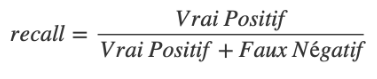

In [13]:
Image(filename='recall.png')

<div class="alert alert-info">
On cherche donc à <font color="red">minimiser le pourcentage de "faux positifs"</font> (erreur de type I) c’est-à-dire  <font color="red">maximiser la Precision (Spécificité)</font>.<br> 
La notification “faux positifs” indique que le client n'a pas de difficultés de paiement mais est prédit comme tel. <br>
<font color="purple">Cela signifie une perte de client pour l’entreprise “Prêt à dépenser”. 

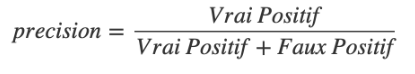

In [14]:
Image(filename='precision.png')

<div class="alert alert-success">
On constate que les “faux négatifs” causent plus de difficultés que “les faux positifs”.<br>               <font color="red"> Coût (faux négatifs) > Coût (faux positifs)      

<div class="alert alert-info">
Pour notre <font color="red">problématique métier, le Recall est plus important que la Precision</font> car on préfèrera vraisemblablement limiter un risque de perte financière plutôt qu’un risque de perte de client potentiel.<br>                                                               <font color="purple">On cherche donc une fonction qui optimise les 2 critères en donnant plus d'importance au recall.</font><br>                                                                      La fonction qui permettra de faire cela est une fonction de la <font color="red">famille des F-beta scores </font>avec Beta comme le coefficient d'importance relative du Recall par rapport à la Precision. <br>        

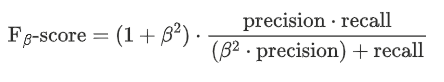

In [15]:
Image(filename='F_Beta_score.png')

<div class="alert alert-success">
C’est <font color="red">cette métrique</font>  qui constitue la <font color="red">fonction de coût</font> que nous chercherons <font color="red">à maximiser              

<h3><font color="red">------------------------- Recherche du meilleur modèle avec RandomizedSearchCV---------------------------</font></h3><a class="anchor" id="section_5_3"></a>

<div class="alert alert-info">
Basons nous sur <font color="red">3 modèles </font> pour obtenir <font color="red">le plus performant</font> avec la méthode <font color="red">RandomizedSearchCV

In [45]:
#   Instanciation des différents modèles 
RFC_clf= RandomForestClassifier()
LGBM_clf=LGBMClassifier()
DTC_clf = DecisionTreeClassifier()


estimators = [("RandomForestClassifier", RFC_clf),
              ("LightGBM",LGBM_clf),
              ("DecisionTreeClassifier", DTC_clf),
                           
              ]            
             

In [46]:
# Hyperparametres utilisés pour RandomizedSearchCV 
weights=(np.linspace(10.0, 20.0, num = 3,dtype= float)) 
    
RFC_rand_params = {'n_estimators':[140,150,160],
                   'max_depth':range(2,5),
                   'criterion': ['gini', 'entropy'],
                   'class_weight': ['balanced']
                  }

LGBM_rand_params = {'n_estimators':[300,700],
                    'max_depth': (6, 10),
                    'num_leaves':(15, 20),
                    'class_weight': ['balanced']
                   }

DTC_rand_params = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
    }    

In [47]:
# Liste des Hyperparametres utilisés pour RandomizedSearchCV 
params_list_RndSearchCV =  {'LightGBM':LGBM_rand_params,
                            'RandomForestClassifier': RFC_rand_params,
                            'DecisionTreeClassifier': DTC_rand_params,
                            
                           }
                            

In [48]:
######################## Utilisation de RandomizedSearchCV ##################################
# Appel de la fonction RandomizedSearchCV : inputs = (estimators,parameters, n_iter, cv,scoring, random_state)

acc = make_scorer(accuracy_score)
auc_score = make_scorer(roc_auc_score)
recall = make_scorer(recall_score)
F1=make_scorer(f1_score)
scoring = {"f1": F1}
score=0
#model=[]
models_best_param=[]
models=[]
Names=[]

le_score = 0
le_temps = 100
le_estim = [0]
le_param = [0]


In [50]:
#====================== hyperparameters Optimisation======================== 

for (nom, est) in (estimators):
    start_time = time.time()
    print("Nom du modèle : ", nom)
    print("Statut : en progression......prière d'attendre")
    
    # Procède à l'évaluation
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)    # n_splits=10, n_repeats=3
    
    # RandomizedSearchCV
    rnd_search = RandomizedSearchCV(est, param_distributions=params_list_RndSearchCV[nom],
                                    n_iter=10, cv=cv, scoring=scoring, n_jobs=-1,    # Ajouter le class_weight et l'ajouter dans parm grid
                                    random_state=42,refit="f1")
    
    
    X_train_1 = X_train_1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    # Entrainement du modèle sur les données d'entrainement
    rnd_search.fit(X_train_1, y_train_1)
    print("Statut : Training Fini")
    
    elapsed_time =(time.time() - start_time)/3600   
    
    best_est =rnd_search.best_estimator_      
    best_param= rnd_search.best_params_
    best_score=rnd_search.best_score_.round(2) 
      
    
    
    if best_score == le_score and elapsed_time < le_temps:
        le_temps = elapsed_time
        le_score = best_score
        le_estim[0] = best_est
        mon_model = le_estim[0]
        le_param[0] = best_param
        le_best_param = le_param[0]
    
    if best_score > le_score:
        le_temps = elapsed_time
        le_score = best_score
        le_estim[0] = best_est
        mon_model = le_estim[0]
        le_param[0] = best_param
        le_best_param = le_param[0]
        

   
    models_best_param.append(best_param)
    models.append(best_est)
    Names.append(nom)
    
    print("Temps écoulé avec RandomizedSearchCV  =", (r"{:.2f}").format(elapsed_time),"Heures")
    print("f1 :",(best_score).round(2))
    print("\n Le meilleur estimateur issu de tous ces paramètres est:\n",best_est)
    print("\n")
    print("===============================================================================")
print("\n")
print("\n models:",models)
print("\n")
print("===============================================================================")
print("\n")
print("\n mon_model:",mon_model)
print("\n")
print("=========================================================================")
print("\n")
print("\n le_best_param:",le_best_param)
print("\n")
print("=========================================================================")

Nom du modèle :  RandomForestClassifier
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearchCV  = 0.14 Heures
f1 : 0.23

 Le meilleur estimateur issu de tous ces paramètres est:
 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, n_estimators=150)


Nom du modèle :  LightGBM
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearchCV  = 0.05 Heures
f1 : 0.25

 Le meilleur estimateur issu de tous ces paramètres est:
 LGBMClassifier(class_weight='balanced', max_depth=10, n_estimators=700,
               num_leaves=20)


Nom du modèle :  DecisionTreeClassifier
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearchCV  = 0.01 Heures
f1 : 0.22

 Le meilleur estimateur issu de tous ces paramètres est:
 DecisionTreeClassifier(class_weight='balanced', max_depth=5)





 models: [RandomForestClas

<div class="alert alert-success">
<b>Liste des modèles et leurs paramètres 
</div>

In [51]:
models

[RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=4, n_estimators=150),
 LGBMClassifier(class_weight='balanced', max_depth=10, n_estimators=700,
                num_leaves=20),
 DecisionTreeClassifier(class_weight='balanced', max_depth=5)]

<div class="alert alert-success">

Le plus performant est <font color="red"> LGBMClassifier() </font> avec les hyper-paramètres:<br>
boosting_type='gbdt', class_weight=None, colsample_bytree=1.0, importance_type='split',silent='warn',<br>
learning_rate=0.1, min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,reg_lambda=0.0,<br> 
n_jobs=-1, objective=None,random_state=None, reg_alpha=0.0,subsample=1.0, subsample_for_bin=200000,<br>
subsample_freq=0,<font color="red"> max_depth=10, n_estimators=700, num_leaves=20 , class_weight='balanced'</font> 
</div>

In [52]:
mon_model

LGBMClassifier(class_weight='balanced', max_depth=10, n_estimators=700,
               num_leaves=20)

<div class="alert alert-success">
Le plus performant est <font color="red"> LGBMClassifier() </font> avec un meilleur F1-score / time 
</div>

<div class="alert alert-info">
<font color="purple">
Recherche de meilleures pondérations des classes

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 27.2 s
Wall time: 27min 59s


Text(0.5, 1.0, 'Scoring pour différentes pondérations de classe')

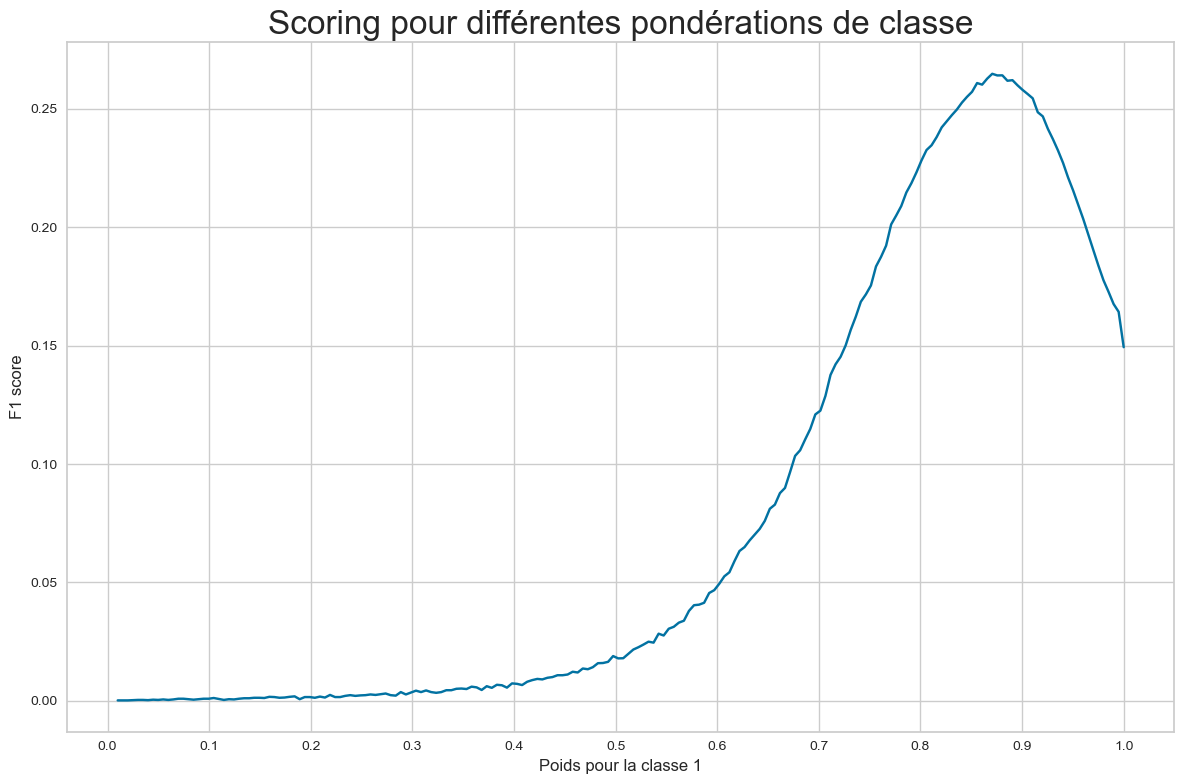

In [53]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= mon_model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_1, y_train_1)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(x = weigh_data['weight'], y = weigh_data['score'])
plt.xlabel('Poids pour la classe 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring pour différentes pondérations de classe', fontsize=24)

<div class="alert alert-success">
À travers le graphique, nous pouvons voir que la valeur la plus élevée pour la <font color="red"> classe minoritaire culmine à environ 0,88</font> de pondération de classe.

En utilisant la recherche par grille, nous avons obtenu le meilleur poids de classe, soit <font color="red">0,12 pour la classe 0</font> (classe majoritaire),<font color="red"> 1 : 0,88 pour la classe 1</font> (classe minoritaire).

Maintenant que nous avons nos meilleurs poids de classe en utilisant la validation croisée stratifiée et la recherche de grille, nous allons voir les performances sur les données de validation.

<div class="alert alert-info">
<font color="purple">
Modèle paramétré

In [56]:
mon_model = LGBMClassifier(max_depth=10, n_estimators=700,num_leaves=20 ,class_weight={0: 0.12, 1: 0.88}) 
mon_model.fit(X_train_1, y_train_1)

LGBMClassifier(class_weight={0: 0.12, 1: 0.88}, max_depth=10, n_estimators=700,
               num_leaves=20)

<div class="alert alert-info">
<font color="purple">
La matrice de confusion

 
Le score f1 pour les données de validation est: 0.26419959050580116
 
CPU times: total: 3.22 s
Wall time: 674 ms


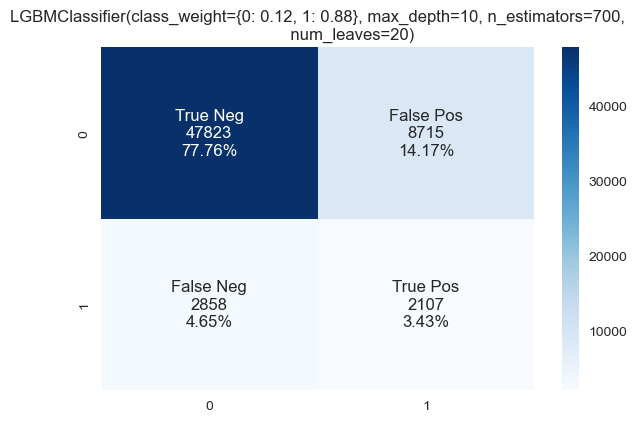

In [57]:
%%time
cf_matrix_f1(mon_model, y_valid_1, mon_model.predict(X_valid_1), mon_model.predict_proba(X_valid_1)[:,1])

<div class="alert alert-info">
<font color="purple">
Visualiser les métriques autrement

<div class = " alert-info">
<font color="red">Le visualiseur de ClassificationReport</font> affiche les scores de <font color="red">précision, de rappel, de F1 et de support</font> du modèle.<br>   
Afin de faciliter l'interprétation et la détection des problèmes, le rapport intègre des <font color="red">scores numériques avec une carte thermique à code couleur

<div class = " alert-info">
    <font color="red">ClassificationReport</font> affiche une représentation des principales mesures de classification par classe.

Cela donne une <font color="red">intuition plus profonde du comportement du classificateur sur la précision globale,</font> ce qui peut masquer les faiblesses fonctionnelles d'une classe d'un problème multiclasse.

<div class = " alert-info">
Les ClassificationReport visuelles sont utilisés pour <font color="red"> comparer les modèles de classification</font> afin de sélectionner les modèles ayant des mesures de classification plus solides ou qui sont plus équilibrés.

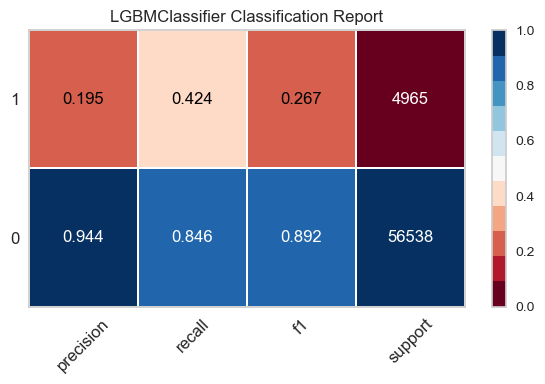

<Axes: title={'center': 'LGBMClassifier Classification Report'}>

In [58]:
fig, ax = plt.subplots(figsize=(6, 4))
mon_model = LGBMClassifier( max_depth=10, n_estimators=700,
               num_leaves=20 , class_weight={0: 0.12, 1: 0.88})
visualizer = ClassificationReport(mon_model, support=True, cmap='RdBu')

visualizer.fit(X_train_1, y_train_1)        # Fit the visualizer and the model
visualizer.score(X_valid_1, y_valid_1)        # Evaluate the model on the test data
visualizer.show()  

<div class="alert alert-info">
<font color="purple">
Réglage du seuil pour améliorer le score F1

In [59]:
# Réglage du seuil pour améliorer le score F1
def adjust_threshold(model, X_test, y_test):
    # Prédiction des probabilités pour la classe positive
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calcul des courbes précision-rappel
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    
    # Calcul des F1-scores pour chaque seuil
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    
    # Trouver le meilleur seuil (celui qui maximise le F1-score)
    best_threshold = thresholds[np.argmax(f1_scores)]
    best_f1 = np.max(f1_scores)
    
    print(f"Meilleur seuil: {best_threshold:.4f}, Meilleur F1-Score: {best_f1:.4f}")
    
    # Générer les nouvelles prédictions avec le meilleur seuil
    y_pred_adjusted = (y_proba >= best_threshold).astype(int)
    
    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred_adjusted))
    
    return best_threshold

In [61]:
from sklearn.metrics import f1_score, precision_recall_curve, classification_report

In [62]:
# Ajuster le seuil pour le modèle

print("\nRéglage de seuil du modèle")
adjust_threshold(mon_model, X_valid_1, y_valid_1)


Réglage de seuil du modèle
Meilleur seuil: 0.5027, Meilleur F1-Score: 0.2672
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     56538
           1       0.20      0.42      0.27      4965

    accuracy                           0.81     61503
   macro avg       0.57      0.63      0.58     61503
weighted avg       0.88      0.81      0.84     61503



0.5027056665449611

<div class="alert alert-info"> 
On peut aussi présenter un autre graphique.<br>
Il s'agit d'un graphique visualisant la relation entre chaque seuil et les quatre mesures de performance :<font color="red"> précision, rappel, score F1 et taux de file d'attente.

In [64]:
## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold


In [67]:
mon_model

LGBMClassifier(class_weight={0: 0.12, 1: 0.88}, max_depth=10, n_estimators=700,
               num_leaves=20)

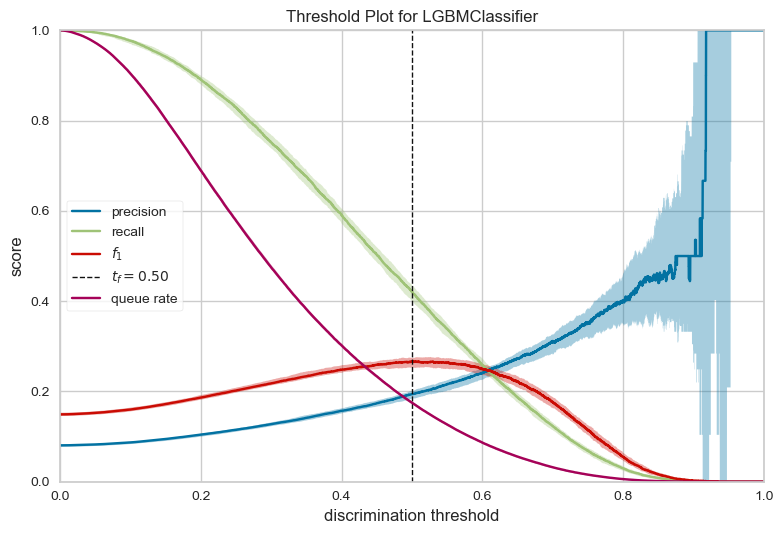

In [65]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    discrimination_threshold(mon_model, X_train_1, y_train_1)

<div class="alert alert-success"> 
La ligne pointillée verticale maximisant le score F1 dans le tracé DT est le <font color="red">seuil de discrimination optimal.

<div class="alert alert-success">
À partir du graphique ci-dessous, nous pouvons observer que l'augmentation de la précision réduit le rappel et vice versa 

<h3><font color="red">----------------- Recherche du meilleur modèle par optimisation avec Optuna-------------------------</font></h3><a class="anchor" id="section_5_4"></a>

<div class="alert alert-info">
Maintenant que nous sommes convaincus que le modèle <font color="red">LightGBMClassifier correspond le mieux</font>, approfondissons les hyperparamètres

<div class="alert alert-info">
Pour essayer de<font color="red"> maximiser les performances</font> de notre modèle de classification LightGBM, nous allons maintenant ajuster les hyperparamètres du modèle avec<font color="red"> Optuna</font> qui est nettement <font color="red">plus rapide</font> que le module de réglage RandomizedSearchCV de scikit-learn et génère souvent de <font color="red">meilleurs résultats.

<div class="alert alert-info">
<font color="red">Optuna est un framework d'optimisation d'hyperparamètres</font> open source pour automatiser la recherche d'hyperparamètres

<div class="alert alert-info">
Il y a <font color="red">10 hyperparamètres</font> dont on a vraiment besoin lors du <font color="red">réglage de LightGBM.

<div class="alert alert-info">
<font color="red">class_weight</font> : définition des poids pour chaque classe<br>
    <font color="red">max_depth</font> : la profondeur maximale des arbres<br>
<font color="red">n_estimators</font> : Nombre total d'arbres à construire <br>
<font color="red">num_leaves</font> : le nombre maximum de feuilles dans un arbre<br>
<font color="red">learning_rate</font> : Taux d'apprentissage <br> 
<font color="red">min_child_samples</font> : Nombre minimum d'exemples nécessaires pour une feuille d'arbre.<br>
<font color="red">reg_alpha</font> : Terme de régularisation L1.<br>
<font color="red">reg_lambda</font> : Terme de régularisation L2.<br>
<font color="red">colsample_bytree</font> : Fraction des caractéristiques (features) à utiliser pour construire chaque arbre.<br>
<font color="red">subsample</font> :Fraction des échantillons utilisés pour construire chaque arbre


<div class="alert alert-info">
Nous allons d'abord créer une fonction objectif. Cela inclut un dictionnaire des hyperparamètres du modèle que nous souhaitons tester, ainsi que les plages de valeurs que nous souhaitons couvrir lors des tests.<br>
<font color="red">Optuna</font> effectuera une série d'exécutions et testera différentes combinaisons d'hyperparamètres en les adaptant à notre modèle, puis en mesurant la précision avant de finalement renvoyer les meilleurs paramètres.

<div class="alert alert-info">

Pour exécuter l'étude Optuna et identifier les meilleurs hyperparamètres pour notre modèle LightGBMClassifier, nous devons créer un échantillonneur.<br>
Nous utilisons TPESampler, qui utilise l'algorithme Tree-Structured Parzen Estimator.<br>
Nous voulons maximiser la précision de notre modèle lors du réglage, en transmettant l'argument "maximize" à create_study() avec notre sampler.<br>
Nous utiliserons ensuite optimize() pour<font color="deeppink"> exécuter 100 essais contre notre fonction objectif.

In [75]:
# Créer une étude Optuna pour maximiser le F1-score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Nombre d'essais d'optimisation


[I 2024-09-05 22:46:02,921] A new study created in memory with name: no-name-7aedca64-405a-49df-b6a9-edaa1b8bcc23
[I 2024-09-05 22:46:06,593] Trial 0 finished with value: 0.24548335974643426 and parameters: {'max_depth': 15, 'n_estimators': 621, 'num_leaves': 23, 'learning_rate': 0.061649485771754824, 'min_child_samples': 14, 'reg_alpha': 7.932919815470002, 'reg_lambda': 6.858794181080498, 'subsample': 0.6004804418940698, 'colsample_bytree': 0.6529775639300376}. Best is trial 0 with value: 0.24548335974643426.
[I 2024-09-05 22:46:09,075] Trial 1 finished with value: 0.22788233144527684 and parameters: {'max_depth': 13, 'n_estimators': 259, 'num_leaves': 50, 'learning_rate': 0.0005709618007103037, 'min_child_samples': 45, 'reg_alpha': 0.006249487827003799, 'reg_lambda': 0.004199501661084982, 'subsample': 0.7928423951714059, 'colsample_bytree': 0.8535819039215555}. Best is trial 0 with value: 0.24548335974643426.
[I 2024-09-05 22:46:11,838] Trial 2 finished with value: 0.244467359403506 

[I 2024-09-05 22:47:41,787] Trial 20 finished with value: 0.24128301886792453 and parameters: {'max_depth': 10, 'n_estimators': 498, 'num_leaves': 38, 'learning_rate': 0.010130905207686313, 'min_child_samples': 50, 'reg_alpha': 0.46177818699801626, 'reg_lambda': 0.01776236180380979, 'subsample': 0.8382945239576296, 'colsample_bytree': 0.6769207549829056}. Best is trial 15 with value: 0.24915540540540543.
[I 2024-09-05 22:47:47,102] Trial 21 finished with value: 0.24598315183891514 and parameters: {'max_depth': 8, 'n_estimators': 876, 'num_leaves': 40, 'learning_rate': 0.033121745791088404, 'min_child_samples': 32, 'reg_alpha': 0.1517284278041767, 'reg_lambda': 0.019332938496078547, 'subsample': 0.755889872487964, 'colsample_bytree': 0.7285909782669728}. Best is trial 15 with value: 0.24915540540540543.
[I 2024-09-05 22:47:53,073] Trial 22 finished with value: 0.24871216314019326 and parameters: {'max_depth': 8, 'n_estimators': 998, 'num_leaves': 45, 'learning_rate': 0.03443232301945467

[I 2024-09-05 22:49:30,126] Trial 41 finished with value: 0.24805324748771046 and parameters: {'max_depth': 11, 'n_estimators': 984, 'num_leaves': 47, 'learning_rate': 0.047874872364148884, 'min_child_samples': 25, 'reg_alpha': 9.614815013145503, 'reg_lambda': 0.0055466092334395655, 'subsample': 0.709195207472633, 'colsample_bytree': 0.7833683010703626}. Best is trial 28 with value: 0.2528907452187294.
[I 2024-09-05 22:49:35,186] Trial 42 finished with value: 0.24936007818681064 and parameters: {'max_depth': 12, 'n_estimators': 890, 'num_leaves': 43, 'learning_rate': 0.07614788507131062, 'min_child_samples': 22, 'reg_alpha': 4.173592711551596, 'reg_lambda': 0.0021988647122988423, 'subsample': 0.7124772137607602, 'colsample_bytree': 0.842521599191779}. Best is trial 28 with value: 0.2528907452187294.
[I 2024-09-05 22:49:41,634] Trial 43 finished with value: 0.2478680611423974 and parameters: {'max_depth': 14, 'n_estimators': 995, 'num_leaves': 38, 'learning_rate': 0.02344018994180553, '

[I 2024-09-05 22:51:14,185] Trial 62 finished with value: 0.2487105474849761 and parameters: {'max_depth': 11, 'n_estimators': 906, 'num_leaves': 44, 'learning_rate': 0.07791526386389447, 'min_child_samples': 24, 'reg_alpha': 1.2475893311877257, 'reg_lambda': 0.005151076879745895, 'subsample': 0.6054142859408065, 'colsample_bytree': 0.8021165872183642}. Best is trial 28 with value: 0.2528907452187294.
[I 2024-09-05 22:51:20,244] Trial 63 finished with value: 0.25104976324488515 and parameters: {'max_depth': 14, 'n_estimators': 966, 'num_leaves': 48, 'learning_rate': 0.043634263037801393, 'min_child_samples': 27, 'reg_alpha': 2.37394866457983, 'reg_lambda': 0.0013983573639923834, 'subsample': 0.6302842719043388, 'colsample_bytree': 0.8312341193515603}. Best is trial 28 with value: 0.2528907452187294.
[I 2024-09-05 22:51:26,391] Trial 64 finished with value: 0.24899189269493613 and parameters: {'max_depth': 14, 'n_estimators': 972, 'num_leaves': 48, 'learning_rate': 0.03097585509506763, 

[I 2024-09-05 22:53:07,792] Trial 83 finished with value: 0.25055886736214605 and parameters: {'max_depth': 11, 'n_estimators': 933, 'num_leaves': 44, 'learning_rate': 0.06735469149195233, 'min_child_samples': 33, 'reg_alpha': 2.280626424033321, 'reg_lambda': 0.002400639166082552, 'subsample': 0.656152330998455, 'colsample_bytree': 0.8016681828062037}. Best is trial 28 with value: 0.2528907452187294.
[I 2024-09-05 22:53:13,787] Trial 84 finished with value: 0.252076209086468 and parameters: {'max_depth': 9, 'n_estimators': 972, 'num_leaves': 46, 'learning_rate': 0.049978404123674235, 'min_child_samples': 35, 'reg_alpha': 3.002415630378988, 'reg_lambda': 0.001285651429214862, 'subsample': 0.6381780661939154, 'colsample_bytree': 0.7801773060098447}. Best is trial 28 with value: 0.2528907452187294.
[I 2024-09-05 22:53:17,255] Trial 85 finished with value: 0.24782732873638255 and parameters: {'max_depth': 9, 'n_estimators': 516, 'num_leaves': 41, 'learning_rate': 0.05012356337347316, 'min_

<div class="alert alert-info">
Pour examiner les résultats de notre étude Optuna, nous pouvons imprimer certaines valeurs renvoyées dans la variable study.<br>
    Nous pouvons voir que <font color="red">nous avons effectué 100 essais</font> et que <font color="red">l'essai numéro 28 a généré les meilleurs résultats,</font> avec une précision de 25,28 %.<br>
En parcourant "trial.params.items()", nous pouvons voir quels étaient les hyperparamètres gagnants et les utiliser dans notre modèle final ajusté.

In [76]:
# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", study.best_params)
print("Meilleur F1-score :", study.best_value)

Meilleurs hyperparamètres : {'max_depth': 10, 'n_estimators': 956, 'num_leaves': 50, 'learning_rate': 0.09991268175245059, 'min_child_samples': 42, 'reg_alpha': 4.342194504227374, 'reg_lambda': 0.007262010652221904, 'subsample': 0.6213673829270457, 'colsample_bytree': 0.7807320855140358}
Meilleur F1-score : 0.2541334966319657


<div class="alert alert-info">
<font color="purple">
Nous allons créer le modèle en utilisant les meilleurs paramètres

In [77]:
# Entraîner le modèle avec les meilleurs hyperparamètres
best_params = study.best_params
best_params['class_weight'] = 'balanced'  # Fixer class_weight à "balanced" comme dans votre modèle de départ
best_model = LGBMClassifier(**best_params, random_state=42)
best_model.fit(X_train_1, y_train_1)

LGBMClassifier(class_weight='balanced', colsample_bytree=0.7807320855140358,
               learning_rate=0.09991268175245059, max_depth=10,
               min_child_samples=42, n_estimators=956, num_leaves=50,
               random_state=42, reg_alpha=4.342194504227374,
               reg_lambda=0.007262010652221904, subsample=0.6213673829270457)

<div class="alert alert-info">
<font color="purple">
Nous allons évaluer le modèle LightGBMClassifier optimisé

In [78]:
# Évaluation finale
y_pred_best = best_model.predict(X_valid_1)
best_f1_score = f1_score(y_valid_1, y_pred_best)
print(f"F1-Score avec les meilleurs hyperparamètres: {best_f1_score:.4f}")

F1-Score avec les meilleurs hyperparamètres: 0.2541


<div class="alert alert-info">
<font color="purple">
Ajustement de la pondération des classes avec un meilleur f1-score

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 52.5 s
Wall time: 1h 2min 43s


Text(0.5, 1.0, 'Scoring pour différentes pondérations de classe')

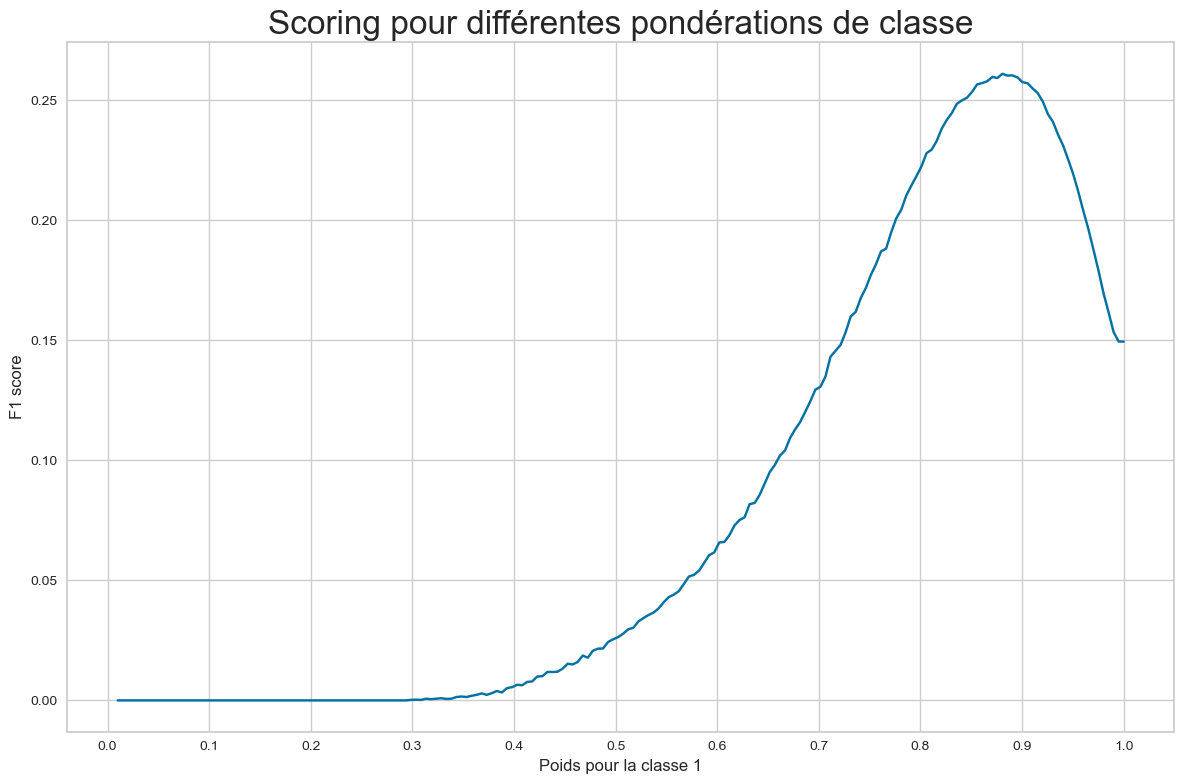

In [79]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= best_model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_1, y_train_1)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(x = weigh_data['weight'], y = weigh_data['score'])
plt.xlabel('Poids pour la classe 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring pour différentes pondérations de classe', fontsize=24)

In [80]:
best_model = LGBMClassifier(colsample_bytree=0.7807320855140358,
               learning_rate=0.09991268175245059, max_depth=10,
               min_child_samples=42, n_estimators=956, num_leaves=50,
               random_state=42, reg_alpha=4.342194504227374,
               reg_lambda=0.007262010652221904, subsample=0.6213673829270457 ,class_weight={0: 0.11, 1: 0.89}) 
best_model.fit(X_train_1, y_train_1)

LGBMClassifier(class_weight={0: 0.11, 1: 0.89},
               colsample_bytree=0.7807320855140358,
               learning_rate=0.09991268175245059, max_depth=10,
               min_child_samples=42, n_estimators=956, num_leaves=50,
               random_state=42, reg_alpha=4.342194504227374,
               reg_lambda=0.007262010652221904, subsample=0.6213673829270457)

<div class="alert alert-info">
    <font color="purple">
La matrice de confusion 

 
Le score f1 pour les données de validation est: 0.26419959050580116
 


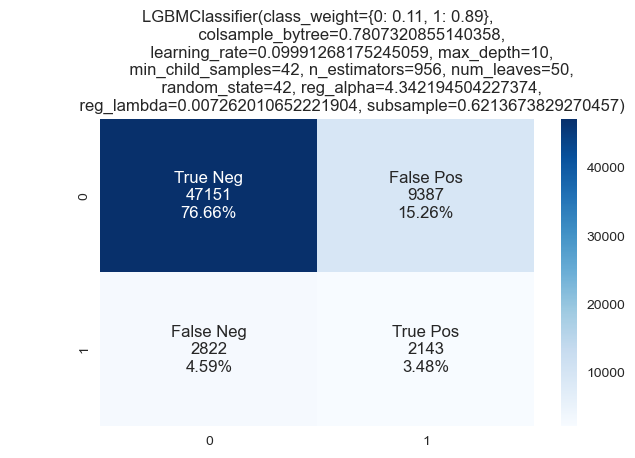

In [81]:

cf_matrix_f1(best_model, y_valid_1, best_model.predict(X_valid_1), best_model.predict_proba(X_valid_1)[:,1])

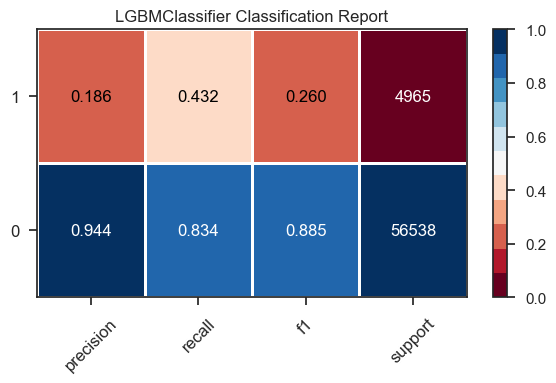

<Axes: title={'center': 'LGBMClassifier Classification Report'}>

In [156]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ClassificationReport(best_model, support=True, cmap='RdBu')

visualizer.fit(X_train_1, y_train_1)        # Fit the visualizer and the model
visualizer.score(X_valid_1, y_valid_1)        # Evaluate the model on the test data
visualizer.show()  

In [29]:
y_pred_best = best_model.predict(X_valid_1)

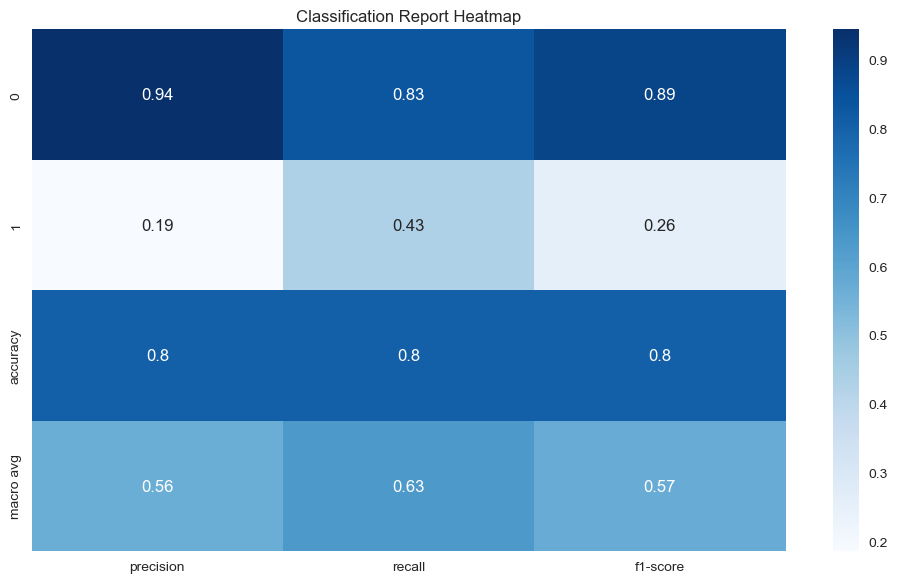

In [30]:

reporti = classification_report(y_valid_1, y_pred_best, output_dict=True)

# Transformer le rapport en DataFrame
dfi = pd.DataFrame(reporti).transpose()

# Afficher en tant que Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dfi.iloc[:-1, :-1], annot=True, cmap="Blues")
plt.title('Classification Report Heatmap')
plt.show()

## Personnalisation du seuil de discrimination

In [6]:
best_model = LGBMClassifier(colsample_bytree=0.7807320855140358,
               learning_rate=0.09991268175245059, max_depth=10,
               min_child_samples=42, n_estimators=956, num_leaves=50,
               random_state=42, reg_alpha=4.342194504227374,
               reg_lambda=0.007262010652221904, subsample=0.6213673829270457 ,class_weight={0: 0.11, 1: 0.89}) 
best_model.fit(X_train_1, y_train_1)

LGBMClassifier(class_weight={0: 0.11, 1: 0.89},
               colsample_bytree=0.7807320855140358,
               learning_rate=0.09991268175245059, max_depth=10,
               min_child_samples=42, n_estimators=956, num_leaves=50,
               random_state=42, reg_alpha=4.342194504227374,
               reg_lambda=0.007262010652221904, subsample=0.6213673829270457)

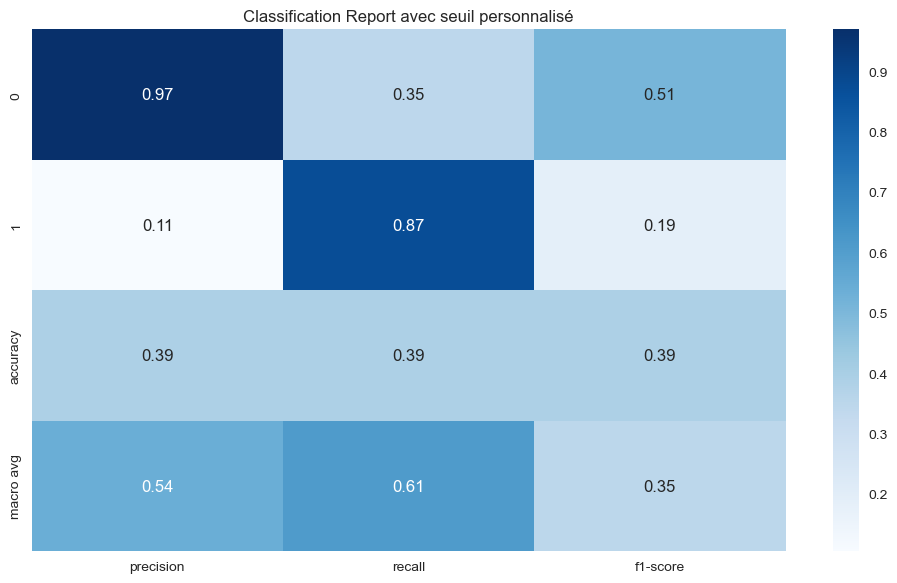

In [80]:
# Prédisons les probabilités
y_proba = best_model.predict_proba(X_valid_1)[:, 1]  # Probabilité pour la classe 1

# Définissons un seuil personnalisé (exemple: 0.2 au lieu de 0.5)
seuil_personnalise = 0.2
y_pred_seuil = (y_proba >= seuil_personnalise).astype(int)

# Affichons le rapport de classification avec le nouveau seuil

report = classification_report(y_valid_1, y_pred_seuil, output_dict=True)

# Transformer le rapport en DataFrame
dff = pd.DataFrame(report).transpose()

# Afficher en tant que Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dff.iloc[:-1, :-1], annot=True, cmap="Blues")
plt.title('Classification Report avec seuil personnalisé')
plt.show()

<Axes: title={'center': 'Matrice de confusion avec seuil=0.2'}>

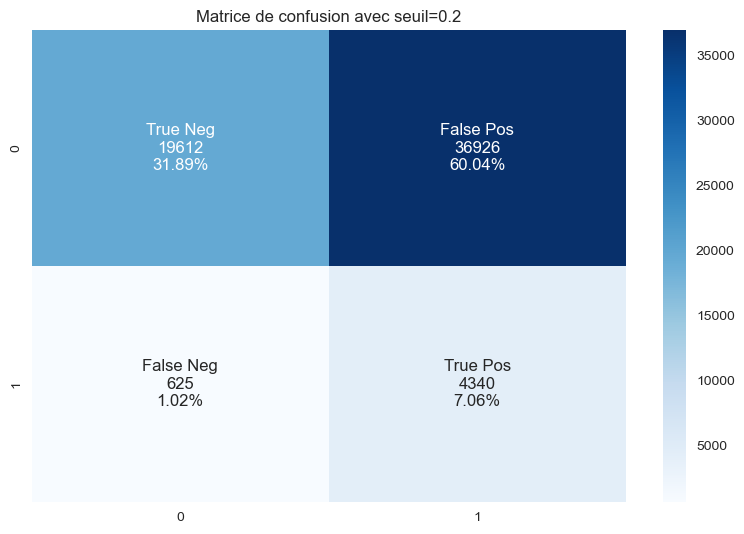

In [53]:
# Rapellons le seuil personnalisé
threshold = 0.2

# Prédire la classe 1 si la probabilité de la classe 1 est supérieure au seuil
y_pred_threshold = (y_proba >= threshold).astype(int)

# Calculer la matrice de confusion
plt.title(f'Matrice de confusion avec seuil={threshold}')

cf_matrix = confusion_matrix(y_valid_1, y_pred_threshold)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
     
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')


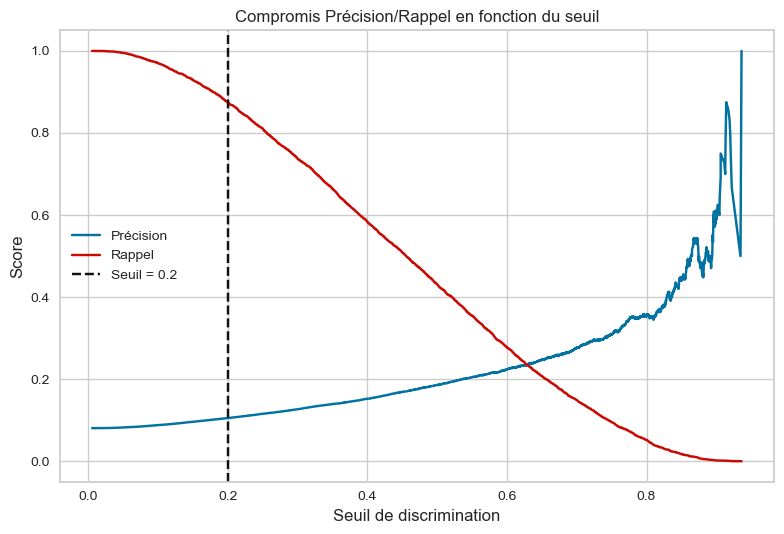

In [54]:
# Courbe de précision-rappel pour visualiser le compromis
precision, recall, thresholds = precision_recall_curve(y_valid_1, y_proba)
plt.figure()
plt.plot(thresholds, precision[:-1], 'b-', label='Précision')
plt.plot(thresholds, recall[:-1], 'r-', label='Rappel')
plt.axvline(x=seuil_personnalise, color='k', linestyle='--', label=f'Seuil = {seuil_personnalise}')
plt.xlabel('Seuil de discrimination')
plt.ylabel('Score')
plt.title('Compromis Précision/Rappel en fonction du seuil')
plt.legend()
plt.show()

<div class="alert alert-success">
<font color="blue">

 - Ce graphique montre clairement le compromis entre précision et rappel.   
    
 - Le <font color="red">seuil est défini à 0,2</font>. Cela signifie que toute observation ayant une probabilité prédite supérieure à 0,2 sera <font color="red">classée comme positive (classe 1)</font>, tandis que celles ayant une probabilité inférieure seront <font color="red">classées comme négatives (classe 0)</font>.
    
 - À ce seuil (0,2), le modèle favorise un <font color="red">rappel élevé au détriment de la précision.    
    
    

<h1> <p><font color="blue">Explication du Modèle et Analyse des Prédictions</font></p></h1><a class="anchor" id="chapter6"></a>

<h3><font color="red">-------------------------------------- Sauvegarde du modèle -----------------------------------------</font></h3><a class="anchor" id="section_6_1"></a>

In [55]:
import joblib

In [58]:
best_model

LGBMClassifier(class_weight={0: 0.11, 1: 0.89},
               colsample_bytree=0.7807320855140358,
               learning_rate=0.09991268175245059, max_depth=10,
               min_child_samples=42, n_estimators=956, num_leaves=50,
               random_state=42, reg_alpha=4.342194504227374,
               reg_lambda=0.007262010652221904, subsample=0.6213673829270457)

In [59]:
mon_best_model = best_model.fit(X_train_1,y_train_1)

In [87]:
# Enregistrons le modèle
CHEMIN = 'C:/Users/PERFECTO/PROJET_7_Streamlit/'
filename = CHEMIN + 'proj_7_model.pkl'
joblib.dump(mon_best_model , filename)

['C:/Users/PERFECTO/PROJET_7_Streamlit/proj_7_model.pkl']

In [60]:
## La prédiction sur l'ensemble X_test
y_pred_model = mon_best_model.predict(X_test)


In [61]:
## DataFrame de la prédiction sur l'ensemble X_test

y_pred_model_df = pd.DataFrame(y_pred_model, columns=['y_pred_test'])

In [62]:
print("Prédictions sur l'ensemble de test")
print(pd.DataFrame({
    "COUNT": y_pred_model_df.value_counts(),
    "RATIO": y_pred_model_df.value_counts() / len(y_pred_model_df) * 100}))

Prédictions sur l'ensemble de test
             COUNT  RATIO
y_pred_test              
0            48311  99.11
1              433   0.89


In [64]:
# y_pred_model_proba est la probabilité que l'instance de données appartienne à chaque classe.
y_pred_model_proba = mon_best_model.predict_proba(X_test)

y_pred_model_proba

array([[0.83437945, 0.16562055],
       [0.88352611, 0.11647389],
       [0.6721159 , 0.3278841 ],
       ...,
       [0.69986179, 0.30013821],
       [0.64731139, 0.35268861],
       [0.65500068, 0.34499932]])

In [65]:
## y_pred_model_proba en DataFrame
y_pred_model_proba_df = pd.DataFrame(y_pred_model_proba, columns=['proba_classe_0', 'proba_classe_1'])

In [66]:
y_pred_model_proba_df

proba_classe_0  proba_classe_1
0                0.83            0.17
1                0.88            0.12
2                0.67            0.33
3                0.83            0.17
4                0.58            0.42
...               ...             ...
48739            0.80            0.20
48740            0.61            0.39
48741            0.70            0.30
48742            0.65            0.35
48743            0.66            0.34

[48744 rows x 2 columns]

In [67]:
y_pred_model_proba_dff = y_pred_model_proba_df.copy()

In [101]:
y_pred_model_proba_df[y_pred_model_proba_df['proba_classe_1'] > 0.6].sort_values(by='proba_classe_1', ascending=False)

proba_classe_0  proba_classe_1
23000            0.29            0.71
45233            0.32            0.68
18054            0.33            0.67
5102             0.35            0.65
30051            0.35            0.65
27722            0.35            0.65
21210            0.36            0.64
25758            0.36            0.64
24719            0.37            0.63
43297            0.38            0.62
26555            0.38            0.62
6373             0.38            0.62
25137            0.38            0.62
40719            0.39            0.61
22465            0.39            0.61
38092            0.39            0.61
32361            0.39            0.61
34703            0.39            0.61
20885            0.39            0.61
9048             0.39            0.61
37366            0.40            0.60
48594            0.40            0.60
32508            0.40            0.60
28263            0.40            0.60

<div class="alert alert-success">
Il y a plusieurs clients qui ont plus de 60% de défaut de paiement.

<h3><font color="red">-------------------------------------- Importance globale des features -----------------------------------------</font></h3><a class="anchor" id="section_6_2"></a>

<div class="alert alert-info">
L’explication  globale cherche à expliquer le modèle dans sa globalité.<br>
C’est-à-dire quelles sont les variables les plus importantes en moyenne pour le modèle.<br>
Nous pouvons expliquer par exemple, quelles sont les caractéristiques qui affectent le comportement général de notre modèle d’allocation de prêt ?
</div>

In [102]:
sorted_idx = np.argsort(mon_best_model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train_1.columns[index], mon_best_model.feature_importances_[index]])

['ext_source_2', 7528]
['cnt_instalment', 6556]
['nb_year_depuis_decision_precedente', 6086]
['days_credit', 5500]
['montant_paye_vs_du', 5237]
['nb_demande_pret_precedente', 3319]
['prev_contrat_type_consumer_loans', 2032]
['age_client', 1258]
['solde_credit_bureau_statut_actif_avec_jours_retard', 1166]
['year_registration', 1159]
['anciennete_entreprise', 1149]
['montant_credit', 1108]
['pop_region', 1079]
['prev_contrat_type_revolving_loans', 942]
['anciennete_cni', 760]
['duree_remboursement', 504]
['region_rating_client_w_city', 480]
['taille_famille', 428]
['name_income_type_fonctionnaire', 131]
['name_contract_type_revolving_loans', 114]
['reg_region_not_work_region_adresse_identique', 82]
['flag_document_6_Oui', 81]
['name_type_suite_Famille', 59]
['flag_own_realty_Y', 57]
['flag_emp_phone_Oui', 29]


In [103]:
## importance des variables
coef_imp_feature = pd.DataFrame({'variable': X_train_1.columns,
                                 'coef': mon_best_model.feature_importances_})
print(coef_imp_feature.sort_values(by='coef', ascending=False))

                                             variable  coef
0                                        ext_source_2  7528
4                                      cnt_instalment  6556
12                 nb_year_depuis_decision_precedente  6086
2                                         days_credit  5500
15                                 montant_paye_vs_du  5237
20                         nb_demande_pret_precedente  3319
21                   prev_contrat_type_consumer_loans  2032
3                                          age_client  1258
16  solde_credit_bureau_statut_actif_avec_jours_re...  1166
24                                  year_registration  1159
1                               anciennete_entreprise  1149
9                                      montant_credit  1108
18                                         pop_region  1079
7                   prev_contrat_type_revolving_loans   942
13                                     anciennete_cni   760
14                                duree_

In [104]:
##
coef_imp_feature.describe().T

count     mean      std   min    25%      50%      75%      max
coef  25.00 1,873.76 2,344.49 29.00 131.00 1,079.00 2,032.00 7,528.00

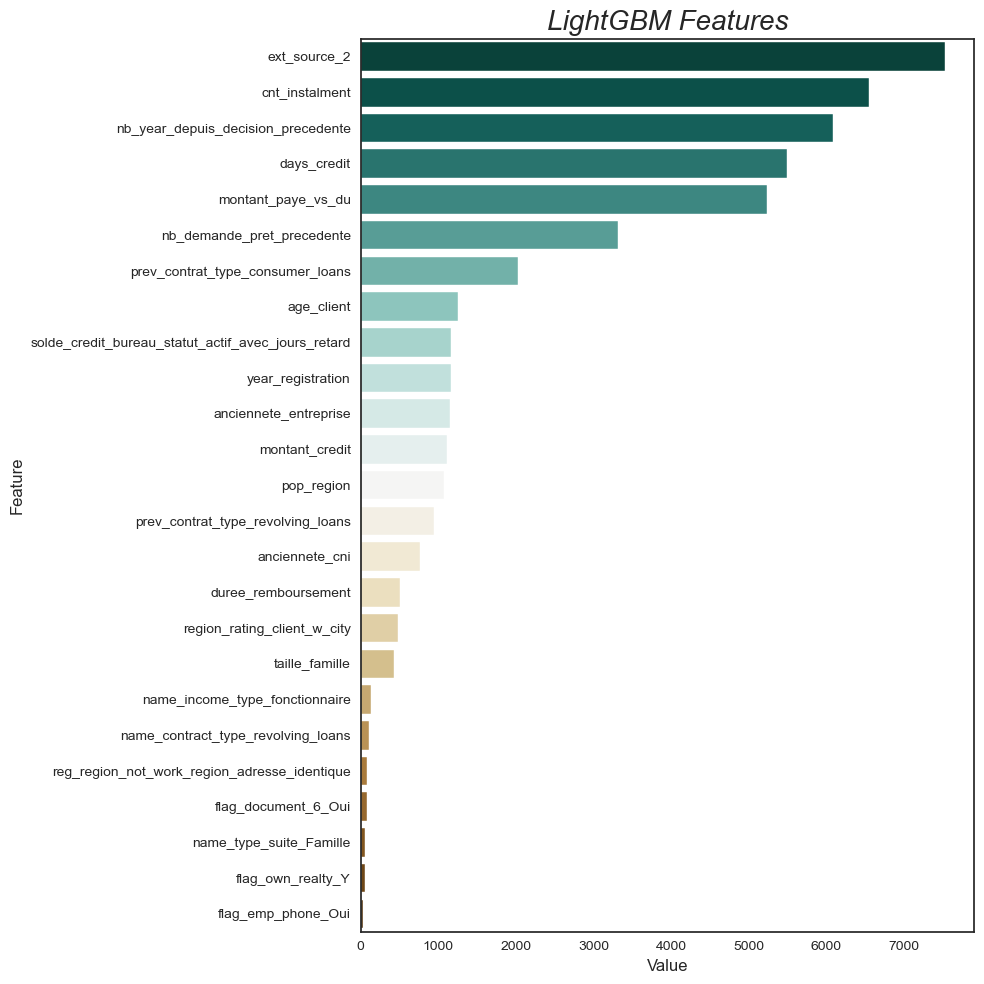

In [105]:
sns.set_style("ticks")

feature_imp = pd.DataFrame(sorted(zip(mon_best_model.feature_importances_, X_train_1.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 10))
sns.barplot(x="Value", y="Feature", 
            data=feature_imp.sort_values(by="Value", ascending=False),
            palette="BrBG_r")
plt.title('LightGBM Features', fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()

<div class="alert alert-warning">
Cette méthode n'est pas trop pertinente et motive l'utilisation des <font color="red"> valeurs SHAP</font> car elles sont accompagnées de garanties de cohérence 
</div>

<div class="alert alert-warning">
    <font color="red">Le but de SHAP </font>est d'expliquer la prédiction d'une instance x en calculant la contribution de chaque fonctionnalité à la prédiction. L'importance des fonctionnalités SHAP est une alternative à l'importance des fonctionnalités de permutation. Il existe une grande différence entre les deux mesures d'importance : l'importance des caractéristiques de permutation est basée sur la diminution des performances du modèle. SHAP est basé sur l'ampleur des attributions de fonctionnalités.

<div class="alert alert-warning">
<font color="red">Les valeurs SHAP</font> estiment <font color="red">l'impact d'une fonctionnalité</font> sur <font color="red">les prédictions</font> tandis que <font color="green">l'importance des fonctionnalités</font> estime <font color="green">l'impact d'une fonctionnalité sur l'ajustement du modèle.
</div>

<h3><font color="red">------------- Explications globales des prédictions pour l’ensemble des données ------------------</font></h3><a class="anchor" id="section_6_3"></a>

<div class="alert alert-info">
L’explication  locale, consiste à expliquer la prévision f(x) d’un modèle pour un individu x donné.<br> 
 Nous pouvons par exemple, pourquoi la demande de prêt d’un client a-t-elle été approuvée ou rejetée.
</div>

<div class = "alert alert-info alert-info">
Les modèles de Machine Learning sont souvent des boîtes noires ce qui rend leur interprétation difficile. Afin de comprendre quelles sont les principales caractéristiques qui affectent la sortie du modèle, nous avons besoin de techniques d'apprentissage automatique explicable qui démêlent certains de ces aspects.

<div class = "alert alert-info alert-info">
L'une de ces techniques est <font color="red">la méthode SHAP</font>, utilisée pour expliquer comment chaque caractéristique affecte le modèle, et permet une analyse locale et globale pour l'ensemble de données et le problème à résoudre.

<div class = "alert alert-info alert-info">
<font color="red">SHAP </font>permet d’expliquer les prédictions des modèles de Machine Learning de manière compréhensible. Grâce à l’attribution d’une valeur à chaque caractéristique entrée, il montre comment et dans quelle mesure chaque caractéristique a contribué au résultat final de la prédiction. Ainsi, nous pouvons comprendre comment le modèle a pris sa décision et pouvons identifier les caractéristiques les plus importantes.

<div class = "alert alert-info alert-info">
Rappelons que l’échantillon <font color="red"> d’apprentissage</font> permet de mettre en avant le rôle des variables dans la <font color="red">modélisation</font>, alors que l’échantillon <font color="red">test</font> éclaire sur l’influence de la variable sur les<font color="red"> performances en généralisation</font> (lorsque le modèle est déployé dans la population)<br><br>
Nous nous positionnons sur le dataset <font color="red">X_test

In [106]:
important_feature_df(mon_best_model,X_test)

col_name  feature_importance_vals
0                                        ext_source_2                22,096.52
4                                      cnt_instalment                21,509.91
2                                         days_credit                20,247.89
15                                 montant_paye_vs_du                15,106.00
20                         nb_demande_pret_precedente                14,177.52
3                                          age_client                 6,560.88
16  solde_credit_bureau_statut_actif_avec_jours_re...                 4,632.11
12                 nb_year_depuis_decision_precedente                 4,386.57
1                               anciennete_entreprise                 4,202.84
24                                  year_registration                 3,922.40
13                                     anciennete_cni                 3,726.47
14                                duree_remboursement                 3,085.99
21                   prev_contrat_type_consumer_loans                 2,952.26
8                         region_rating_client_w_city                 2,462.41
9                                      montant_credit                 2,216.87
23                 name_contract_type_revolving_loans                 1,975.71
18                                         pop_region                 1,575.84
7                   prev_contrat_type_revolving_loans                 1,411.58
11                     name_income_type_fonctionnaire                   992.18
10                                     taille_famille                   987.62
5                                   flag_own_realty_Y                   691.89
6                             name_type_suite_Famille                   315.57
22                                 flag_emp_phone_Oui                   278.88
17                                flag_document_6_Oui                   174.79
19       reg_region_not_work_region_adresse_identique                   122.47

<div class = "alert alert-info alert-info">
<font color="red"> Les valeurs de Shapley</font> calculent l’importance d’une variable en comparant ce qu’un modèle prédit avec et sans cette variable.<br>
Cependant, étant donné que l’ordre dans lequel un modèle voit les variables peut affecter ses prédictions, cela se fait dans tous les ordres possibles, afin que les fonctionnalités soient comparées équitablement.<br>
Cette approche est inspirée de la théorie des jeux.
</div>

<div class = "alert alert-info alert-info">
<font color="red">TreeExplainer </font>utilise une approche basée sur l’approximation de l’ensemble des arbres pour calculer les valeurs SHAP de chaque caractéristique. Il permet donc d’expliquer les prédictions de modèles de Machine Learning grâce aux arbres de décision. Il est aussi utile pour expliquer les modèles de régression et de classification.

In [107]:
shap.initjs()
explainer = shap.TreeExplainer(mon_best_model)
shap_values = explainer.shap_values(X_test)

In [108]:
# Shap_values pour la classe 0 et la classe 1
shap_values

[array([[ 7.08983392e-01, -5.46302496e-02,  3.66160005e-01, ...,
         -3.32058806e-03, -4.15325148e-02,  4.33429080e-02],
        [ 2.23429175e-01,  2.09392850e-01,  3.05842084e-01, ...,
          3.98720564e-04, -2.47068974e-02,  2.61251177e-01],
        [ 4.29801377e-01,  9.19383148e-02,  4.85880331e-01, ...,
         -2.84292061e-03, -4.36654989e-02, -1.15049294e-01],
        ...,
        [ 5.46597631e-01, -1.86748653e-03,  4.20313941e-01, ...,
         -3.09487653e-03, -2.65670444e-02, -1.14200275e-01],
        [ 3.86478742e-01, -2.46348934e-02,  5.36752778e-01, ...,
         -2.90574892e-03, -4.22615244e-02, -1.29282869e-01],
        [ 4.00116028e-01, -1.52734940e-01,  4.57313745e-01, ...,
         -6.65697037e-03, -3.68901832e-02, -1.09958706e-01]]),
 array([[-7.08983392e-01,  5.46302496e-02, -3.66160005e-01, ...,
          3.32058806e-03,  4.15325148e-02, -4.33429080e-02],
        [-2.23429175e-01, -2.09392850e-01, -3.05842084e-01, ...,
         -3.98720564e-04,  2.47068974e

In [109]:
# Shap_values uniquement pour la classe 1
shap_values[1]

array([[-7.08983392e-01,  5.46302496e-02, -3.66160005e-01, ...,
         3.32058806e-03,  4.15325148e-02, -4.33429080e-02],
       [-2.23429175e-01, -2.09392850e-01, -3.05842084e-01, ...,
        -3.98720564e-04,  2.47068974e-02, -2.61251177e-01],
       [-4.29801377e-01, -9.19383148e-02, -4.85880331e-01, ...,
         2.84292061e-03,  4.36654989e-02,  1.15049294e-01],
       ...,
       [-5.46597631e-01,  1.86748653e-03, -4.20313941e-01, ...,
         3.09487653e-03,  2.65670444e-02,  1.14200275e-01],
       [-3.86478742e-01,  2.46348934e-02, -5.36752778e-01, ...,
         2.90574892e-03,  4.22615244e-02,  1.29282869e-01],
       [-4.00116028e-01,  1.52734940e-01, -4.57313745e-01, ...,
         6.65697037e-03,  3.68901832e-02,  1.09958706e-01]])

<div class = "alert alert-info alert-info">
Les valeurs Shapley restent l’élément central. Une fois qu'on se rend compte que ceci est simplement une matrice avec les mêmes dimensions que nos données d’entrée et que nous pouvons l’analyser de différentes manières pour expliquer le modèle
</div>

In [110]:
print('\n')
print('Features matrix - # rows, # columns:', X_test.shape)
print('\n')
print('SHAP values matrix - # rows, # columns:', np.shape(shap_values[1]))



Features matrix - # rows, # columns: (48744, 25)


SHAP values matrix - # rows, # columns: (48744, 25)


<div class="alert alert-info">

On précise que <font color="red">shap_values[1] correspond à la classe 1

<div class = "alert alert-info alert-info">
Cela signifie qu'il existe une valeur SHAP pour chaque valeur dans notre matrice de fonctionnalités. En d'autres termes, chaque observation (ligne) a une valeur SHAP pour chacune de ses caractéristiques (colonnes) qui explique la contribution de cette caractéristique à la prédiction du modèle pour cette observation.
</div>

<div class = "alert alert-info alert-info">
<font color="red">L’importance des variables est calculée en moyennant la valeur absolue des valeurs de Shap.</font> <br>

<font color="red">Les caractéristiques sont classées de l'effet le plus élevé au plus faible sur la prédiction.</font> Il prend en compte la valeur SHAP absolue, donc peu importe si la fonctionnalité affecte la prédiction de manière positive ou négative.<br>

<font color="red">Un diagramme d'importance des variables répertorie les variables les plus significatives par ordre décroissant.</font> Les variables du haut contribuent davantage au modèle que celles du bas et ont donc un pouvoir prédictif élevé.
</div>

In [111]:
shap_values_df = pd.DataFrame(data=shap_values[1], columns=X_test.columns)
shap_values_df.shape

(48744, 25)

<div class="alert alert-info">
<font color="red">shap_values_df</font> correspond au <font color="red">DataFrame issu de shap_values[1]

In [112]:
shap_values_df.head()

ext_source_2  anciennete_entreprise  days_credit  age_client  \
0         -0.71                   0.05        -0.37       -0.14   
1         -0.22                  -0.21        -0.31       -0.24   
2         -0.43                  -0.09        -0.49       -0.09   
3         -0.56                  -0.01        -0.52        0.09   
4         -0.47                  -0.06         0.07        0.22   

   cnt_instalment  flag_own_realty_Y  name_type_suite_Famille  \
0            0.34              -0.01                    -0.01   
1            0.70              -0.01                     0.01   
2            0.50              -0.01                     0.01   
3            0.33               0.01                     0.00   
4            0.55               0.03                    -0.00   

   prev_contrat_type_revolving_loans  region_rating_client_w_city  \
0                              -0.01                        -0.01   
1                              -0.03                         0.01   
2                              -0.01                        -0.01   
3                              -0.08                         0.01   
4                               0.01                         0.02   

   montant_credit  ...  montant_paye_vs_du  \
0           -0.01  ...               -0.23   
1           -0.16  ...               -0.33   
2            0.00  ...               -0.24   
3           -0.08  ...               -0.25   
4            0.02  ...               -0.26   

   solde_credit_bureau_statut_actif_avec_jours_retard  flag_document_6_Oui  \
0                                               0.25                 -0.00   
1                                              -0.03                 -0.00   
2                                               0.39                 -0.00   
3                                              -0.02                 -0.00   
4                                              -0.03                 -0.00   

   pop_region  reg_region_not_work_region_adresse_identique  \
0        0.06                                         -0.00   
1       -0.03                                         -0.00   
2        0.06                                         -0.00   
3        0.03                                         -0.00   
4       -0.02                                         -0.00   

   nb_demande_pret_precedente  prev_contrat_type_consumer_loans  \
0                        0.05                             -0.00   
1                        0.30                             -0.15   
2                        0.31                             -0.02   
3                        0.31                             -0.09   
4                        0.25                             -0.06   

   flag_emp_phone_Oui  name_contract_type_revolving_loans  year_registration  
0                0.00                                0.04              -0.04  
1               -0.00                                0.02              -0.26  
2                0.00                                0.04               0.12  
3                0.00                                0.04               0.06  
4                0.00                                0.06              -0.03  

[5 rows x 25 columns]

In [113]:
print("Moyenne des valeurs absolues des valeurs de Shap")
shap_values_df.abs().mean().sort_values(ascending=False)

Moyenne des valeurs absolues des valeurs de Shap


ext_source_2                                         0.45
cnt_instalment                                       0.44
days_credit                                          0.42
montant_paye_vs_du                                   0.31
nb_demande_pret_precedente                           0.29
age_client                                           0.13
solde_credit_bureau_statut_actif_avec_jours_retard   0.10
nb_year_depuis_decision_precedente                   0.09
anciennete_entreprise                                0.09
year_registration                                    0.08
anciennete_cni                                       0.08
duree_remboursement                                  0.06
prev_contrat_type_consumer_loans                     0.06
region_rating_client_w_city                          0.05
montant_credit                                       0.05
name_contract_type_revolving_loans                   0.04
pop_region                                           0.03
prev_contrat_t

<div class = "alert alert-info alert-info">
<font color="red">Le summary plot</font> permet de voir les variables les plus importantes et l’amplitude de leur impact sur le modèle. Il peut prendre plusieurs formes graphiques.
</div>

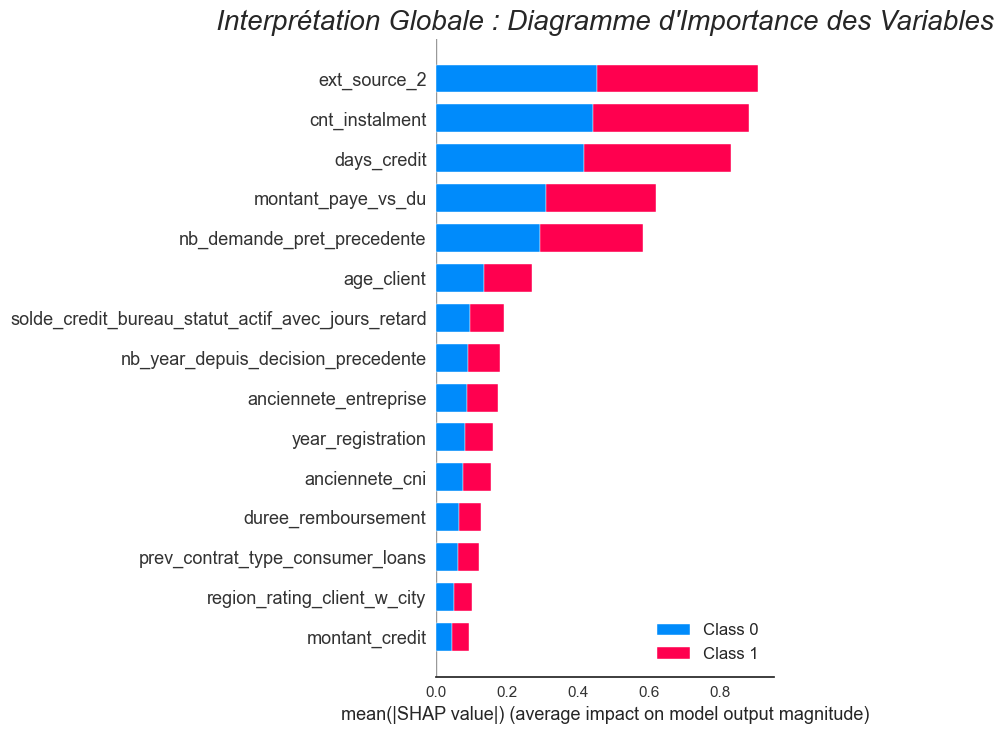

In [114]:
feature_importance_graphic_bar(mon_best_model,X_test)

<div class = "alert alert-block alert-success">  
Dans ce graphique, l'importance de la fonctionnalité est organisée par ordre décroissant du plus haut au plus bas. Cet ordre montre l'impact des fonctionnalités sur la prédiction. Il montre la valeur en forme de valeur absolue, de sorte que les prédictions ne sont pas affectées positivement ou négatives.<br>

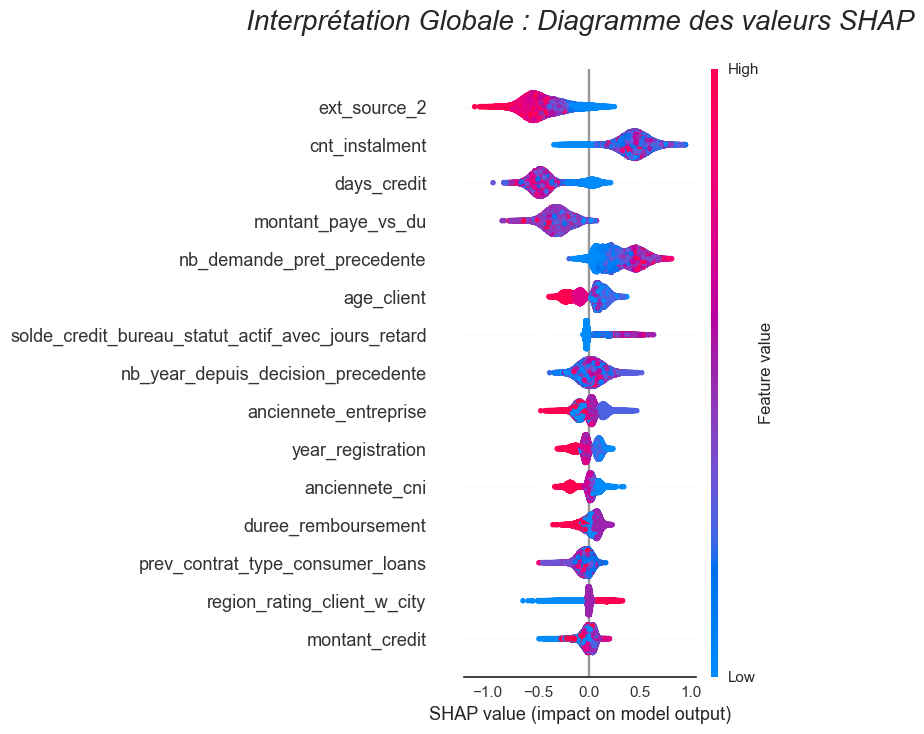

In [115]:
# Pour la class 1
feature_importance_graphic_dot(mon_best_model,X_test)

<div class = "alert alert-block alert-success">  
Ce graphique s'intitule  <b><font color="red">'beeswarm'</font></b>
Les caractéristiques sont classées en fonction de leur effet sur la prédiction, mais nous pouvons également voir comment les valeurs supérieures et inférieures de la caractéristique affecteront le résultat.

<div class = "alert alert-block alert-success">
<font color="red">Tous les petits points sur le graphique représentent une seule observation.</font><br> L'axe horizontal représente la valeur SHAP, tandis que la couleur du point nous indique si cette observation a une valeur supérieure ou inférieure, par rapport aux autres observations.

<div class = "alert alert-block alert-success">  
Toutes les valeurs élevées de la variable <b><font color="red">'ext_source_2'</font></b> ont une <font color="red">contribution négative élevée</font> sur <font color="red">la prédiction en classe 1.</font><br>
Tandis que <font color="blue">la contribution positive</font>  provient <font color="blue">des valeurs faibles de cette même variable 'ext_source_2'</font><br>

<div class = "alert alert-block alert-success">
<font color="red">La contribution négative</font> sur <font color="red">la prédiction en classe 1.</font>  provient de quelques <font color="red">valeurs faibles</font> de la variable <b><font color="red">'cnt_instalment'</font></b><br>

Toutes <font color="red">les valeurs élevées</font> de la variable  ont une <font color="red">contribution postive élevée</font> sur <font color="red">la prédiction en classe 1.</font><br>

<div class = "alert alert-block alert-success">  
Toutes les <font color="blue">valeurs élevées</font> de la variable <b><font color="red">'days_credit'</font></b> ont une <font color="blue">contribution négative élevée</font> sur <font color="red">la prédiction en classe 1.</font><br>
Tandis que <font color="blue">quelques valeurs faibles</font> de cette même variable <b><font color="red">'days_credit'</font></b> y ont <font color="blue">une contribution positive .</font><br>
<font color="red">Cela signifie que :</font><br>
Les clients qui ont un nombre de jours court entre la demande actuelle de crédit et sa demande précédente enregistrée au bureau de crédit ,<font color="red">ont plus de chance d'être catégorisés en classe 1 c'est à dire en défaut de paiement. </font><br> 
Quelques clients qui ont un nombre de jours élevé entre la demande actuelle de crédit du client et sa demande précédente enregistrée au bureau de crédit ,<font color="red">ont moins de chance d'être catégorisés en classe 1 c'est à dire en défaut de paiement. </font><br>

<div class = "alert alert-block alert-success">  
Les <font color="blue">valeurs élevées</font> de la variable <b><font color="red">'age_client'</font></b> ont une <font color="blue">contribution négative </font> sur <font color="red">la prédiction en classe 1.</font><br>
Tandis que <font color="blue">les valeurs faibles</font> de cette même variable <b><font color="red">'age_client'</font></b> y ont <font color="blue">une contribution positive.</font><br>
<font color="red">Cela signifie que :</font><br>
Les clients moins âgés<font color="red"> ont plus de chance d'être catégorisés en classe 1 c'est à dire en défaut de paiement. </font><br> 
Les clients âgés<font color="red"> ont moins de chance d'être catégorisés en classe 1 c'est à dire en défaut de paiement. </font><br>

<h3><font color="red">-------------------------------------------- Interactions avec les fonctionnalités ---------------------------------------</font></h3><a class="anchor" id="section_6_4"></a>

<div class = "alert alert-info alert-info">
Le package SHAP nous permet d'explorer <font color="red">comment nos fonctionnalités interagissent les unes avec les autres </font> pour produire les prédictions de notre modèle. 
</div>

<div class = "alert alert-info alert-info">
<font color="red">Un diagramme de dépendance</font> est un nuage de points qui montre l'effet d'une seule caractéristique sur les prédictions faites par le modèle.
</div>

<div class = "alert alert-info alert-info">
<font color="red">Chaque point est une seule prédiction</font> (ligne) de l'ensemble de données.<br>

L'axe des x est <font color="red">la valeur de la caractéristique</font> (de la matrice X).<br>

L'axe Y est <font color="red">la valeur SHAP de cette fonctionnalité</font>, qui représente dans quelle mesure la connaissance de la valeur de cette fonctionnalité modifie la sortie du modèle pour la prédiction de cet échantillon.
</div>

<div class = "alert alert-info alert-info">
La couleur correspond à une seconde entité qui peut avoir<font color="red"> un effet d'interaction</font> avec l'entité que l'on trace (par défaut cette seconde entité est choisie automatiquement).

In [116]:
explainer = shap.TreeExplainer(mon_best_model)
shap_values = explainer.shap_values(X_test)

<div class = "alert alert-info alert-danger">
    Nous indiquons que nous menons notre étude ici <font color="blue">sur la classe 1</font> c'est-à-dire celle qui représente les clients avec <font color="blue">une forte probabilité de défaut de paiement.

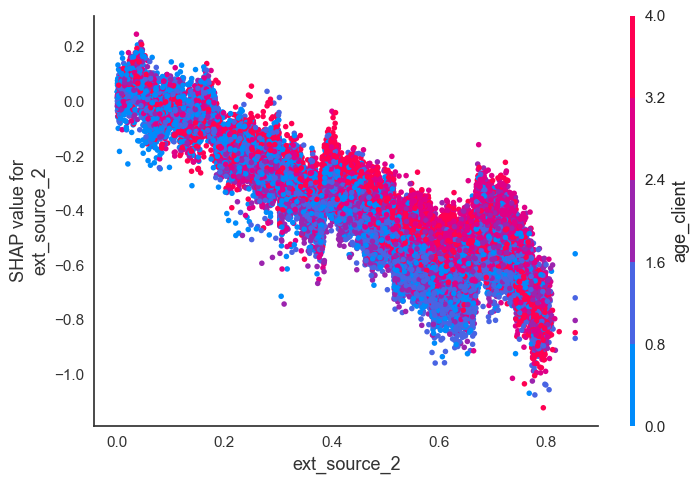

In [117]:
shap.dependence_plot("ext_source_2", shap_values[1], X_test)

<div class = "alert alert-block alert-success">
Plus la valeur du <font color="red">"Score normalisé à partir d'une source de données externe"</font> est <font color="blue">faible</font> (tous les points), et <font color="red">plus la valeur Shap est élevée</font> et donc <font color="red">plus le modèle prédit que le client aura des difficultés de paiement.</font><br>
<font color="red">Forte dépendance </font>entre la variable "age_client" et la variable "ext_source_2"     
</div>

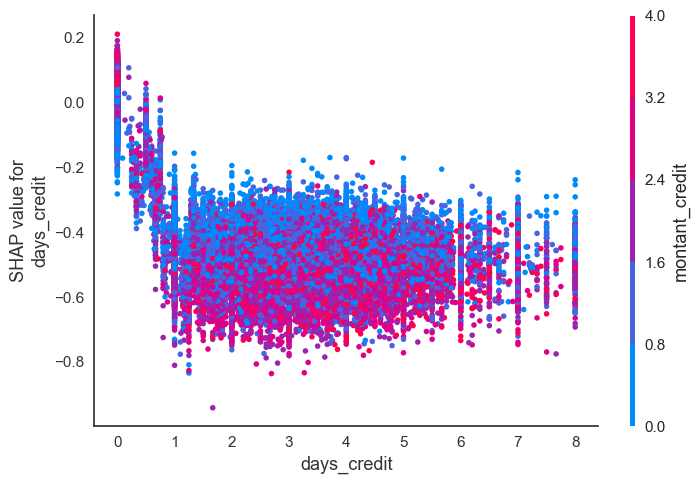

In [118]:
shap.dependence_plot("days_credit", shap_values[1], X_test)

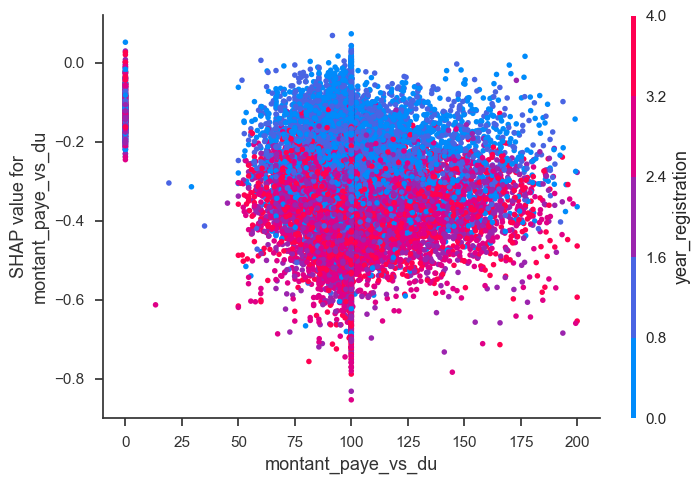

In [145]:
shap.dependence_plot("montant_paye_vs_du", shap_values[1], X_test)

<div class = "alert alert-block alert-success">

Lorsque  <font color="red">le montant_paye_vs_du est inférieur à 100</font> (paiement partiel) , les  <font color="red">valeurs SHAP deviennent de plus en plus négatives</font>.
    
Cela suggère que les <font color="red">paiements partiels réduisent la prédiction du modèle</font> (par exemple, un risque de défaut ou de retard pourrait être estimé plus bas si une partie du montant est déjà payée, mais pas encore complètement).
    
Inversement, pour des  <font color="red">valeurs supérieures à 100 (paiements excédentaires), les  <font color="red">valeurs SHAP restent négatives, bien que de façon plus dispersée.
    
Les  <font color="red">paiements excédentaires ne semblent pas influencer beaucoup les prédictions</font>, ou ils les réduisent légèrement.

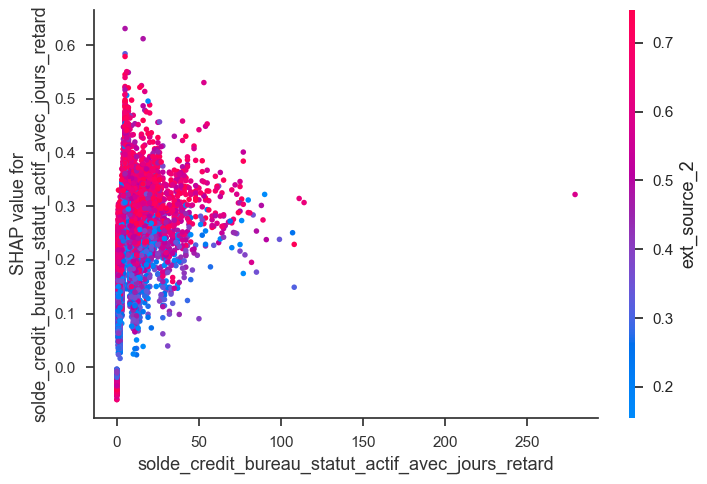

In [152]:
shap.dependence_plot("solde_credit_bureau_statut_actif_avec_jours_retard", shap_values[1], X_test)

<div class = "alert alert-block alert-success">
On observe que la plupart des points sont concentrés vers la gauche, indiquant que <font color="red">beaucoup d'individus ont des valeurs faibles</font> de solde_credit_bureau_statut_actif_avec_jours_retard (moins de 100 jours de retard).

Pour ces <font color="red">valeurs basses, la valeur SHAP est généralement faible</font> mais varie entre 0 et 0,4, suggérant que même de petits retards peuvent avoir un impact modéré sur les prédictions du modèle.
    
Les points en rose (valeurs élevées de ext_source_2) semblent être principalement concentrés dans la partie médiane des valeurs de solde_credit_bureau_statut_actif_avec_jours_retard, avec des valeurs SHAP plutôt dispersées.
    
Cela pourrait indiquer que les individus avec des valeurs élevées de <font color="red">ext_source_2 (Score normalisé à partir d'une source de données externe)</font> ont un profil de risque plus hétérogène.
    
À l'inverse, les points en bleu <font color="red">,valeurs basses de ext_source_2</font>, tendent à avoir des <font color="red">valeurs SHAP plus basses,</font> ce qui suggère que ces individus sont moins affectés par le retard de paiement dans la prédiction.           

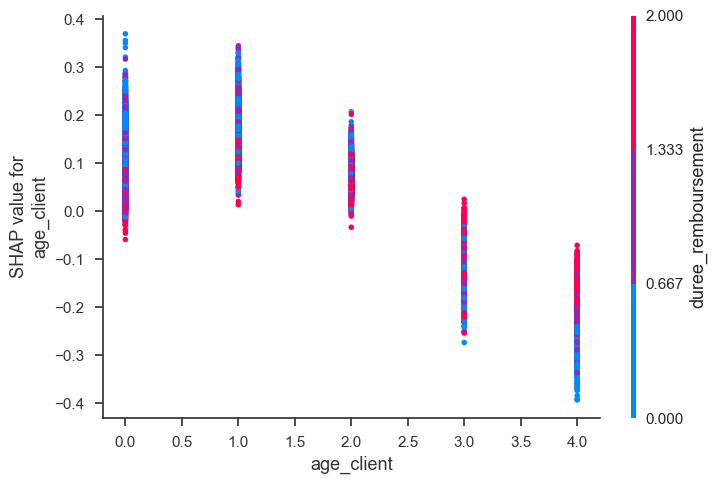

In [144]:
shap.dependence_plot("age_client", shap_values[1], X_test)

<div class = "alert alert-info alert-info">
Nous avions transformé les âges en différentes classes suivantes :<br>
0 = '32_ans_et_moins'<br>
1 = '33_a_39_ans'<br>
2 = '40_a_47_ans'<br>
3 = '48_a_56_ans'<br>
4 = '57_ans_et_plus'

<div class = "alert alert-block alert-success">
Plus <font color="red">le client</font> est jeune , <font color="red">plus la valeur Shap est élevée</font> et <font color="red">donc plus le modèle prédit que le client aura des difficultés de paiement</font>    
       
<font color="blue">Les clients âgés de moins de 40 ans</font>  présentent un fort risque <font color="blue">de défaut de paiement  </font>   
   
</div>

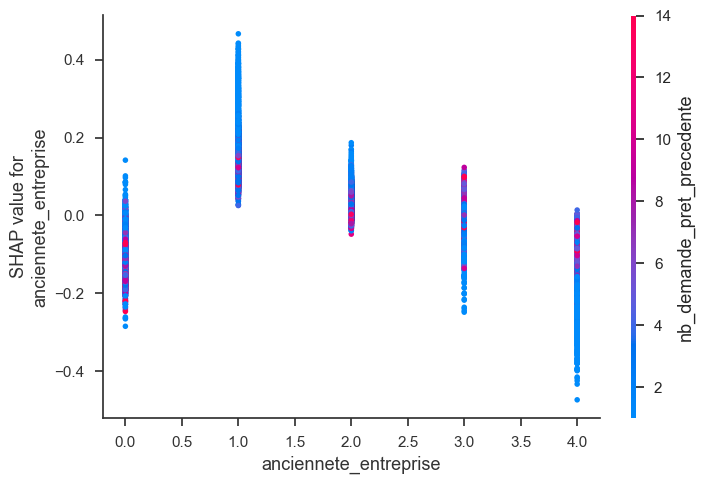

In [146]:
shap.dependence_plot("anciennete_entreprise", shap_values[1], X_test)

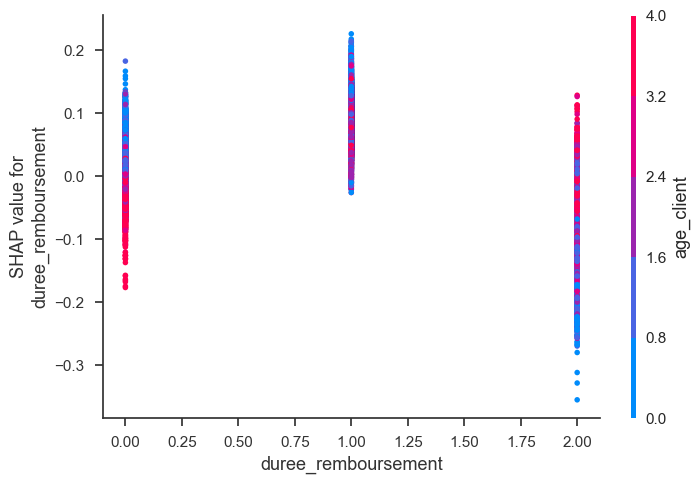

In [147]:
shap.dependence_plot("duree_remboursement", shap_values[1], X_test)

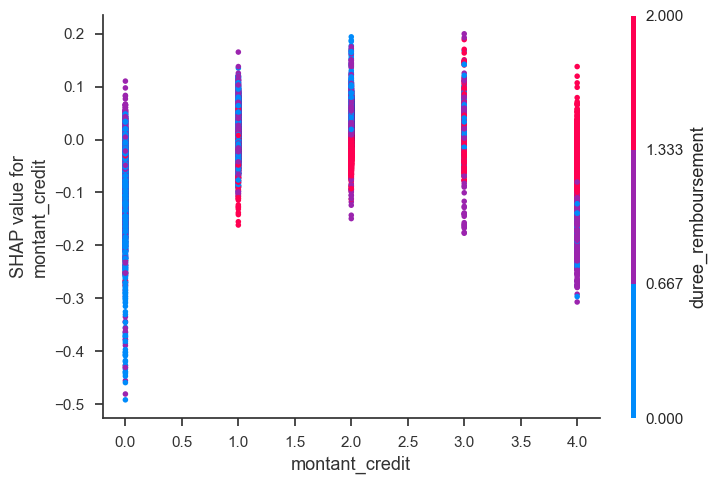

In [148]:
shap.dependence_plot("montant_credit", shap_values[1], X_test)

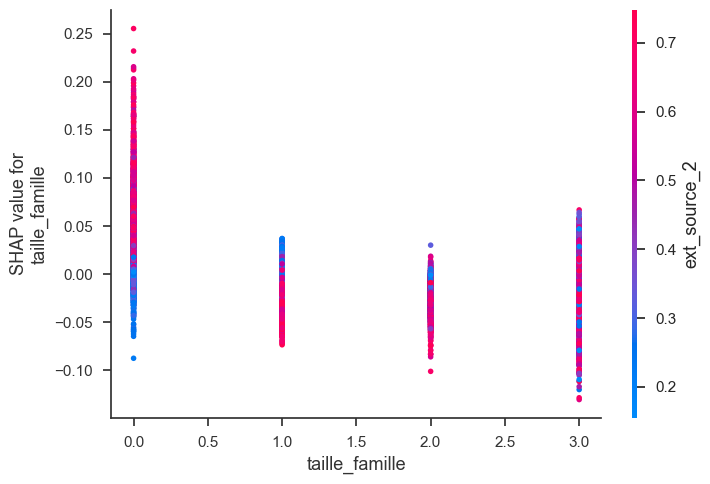

In [149]:
shap.dependence_plot("taille_famille", shap_values[1], X_test)

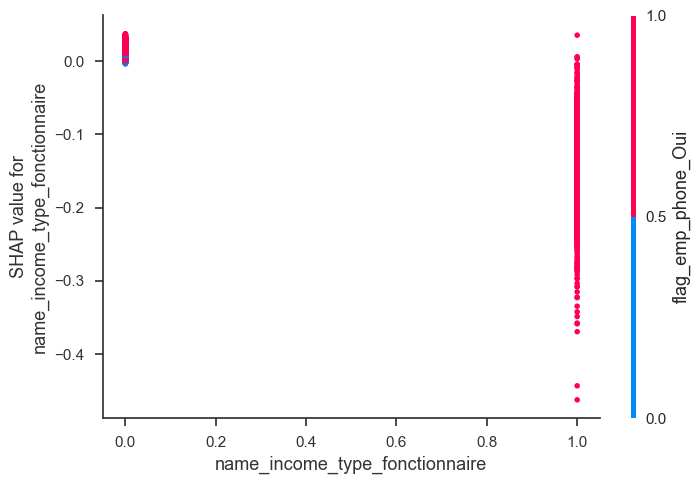

In [150]:
shap.dependence_plot("name_income_type_fonctionnaire", shap_values[1], X_test)

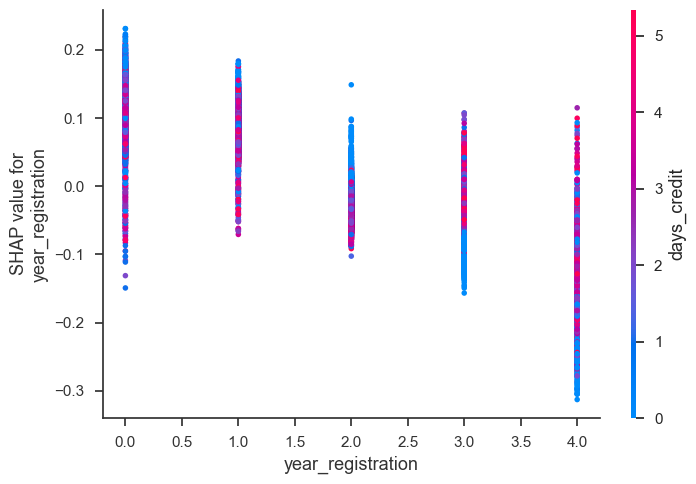

In [151]:
shap.dependence_plot("year_registration", shap_values[1], X_test)

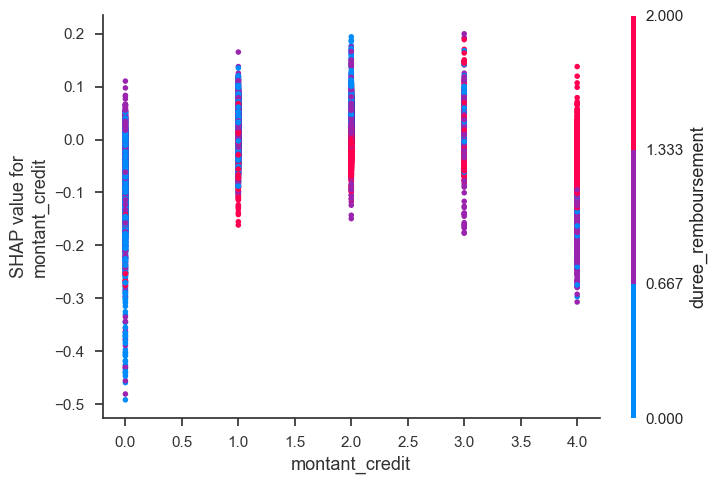

In [153]:
shap.dependence_plot("montant_credit", shap_values[1], X_test)

<h3><font color="red">--------------- Explications  des prédictions pour une observation individuelle -----------------------</font></h3><a class="anchor" id="section_6_5"></a>

<div class = "alert alert-info alert-info">
Pour les visualisations d’explications d’une observation, nous allons utiliser deux alternatives:<font color="red"> decision plot </font> et <font color="red">force plot.</font><br>
Pour une instance, ces deux représentations sont redondantes, <font color="red">elles représentent l’information de manière très similaire.</font>

<div class = "alert alert-info alert-info">
Nous allons nous positionner sur<font color="red"> une seule ligne</font> pour comprendre l'influence des variables sur la prédiction

<div class = "alert alert-info alert-info">
Nous travaillerons avec notre dataset X_test.<br>
On suppose ici que l'index de ce dataset représente <font color="red">le numéro d'dentification d'un client</font> ,avec toutes les informations le concernant, demandant un crédit

<div class="alert alert-info">

<h3>Regardons le cas d'un<font color="red"> client qui a fait une demande de crédit</font> et retenons son identifiant

In [119]:

shap.initjs()

idx = 900
print("Client numero : ", idx)
print("Model Prediction : Classe", y_pred_model[idx])
print(f"Il y a {y_pred_model_proba[idx][1]:.1%} de risques que le client ait des difficultés de paiement")

Client numero :  900
Model Prediction : Classe 0
Il y a 15.0% de risques que le client ait des difficultés de paiement


In [120]:
idx = 2000
print("Client numero : ", idx)
print("Model Prediction : Classe", y_pred_model[idx])
print(f"Il y a {y_pred_model_proba[idx][1]:.1%} de risques que le client ait des difficultés de paiement")

Client numero :  2000
Model Prediction : Classe 1
Il y a 54.9% de risques que le client ait des difficultés de paiement


<div class = "alert alert-info alert-info">
Présentons cette analyse avec la fonction<font color="red"> shap.decision_plot

<div class = "alert alert-info alert-info">
<font color="red">La fonction shap.decision_plot</font>, pour un ensemble d’échantillons, devient vite encombrant si nous sélectionnons trop d’instances. Il est très utile pour observer ‘un écart de trajectoire’ ou des “trajectoires divergentes/convergentes” d’un groupe d’instances limité.

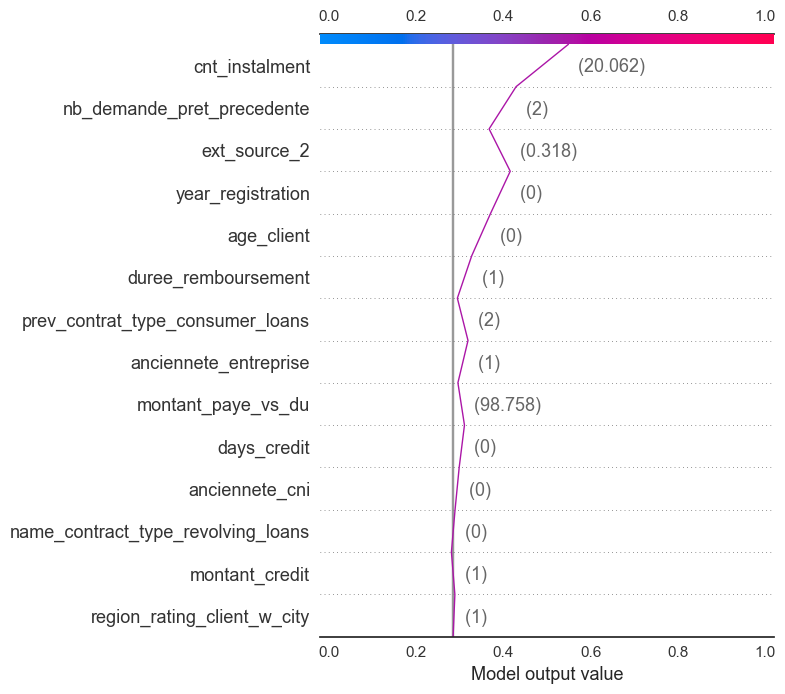

In [121]:
shap.decision_plot(explainer.expected_value[1], 
                   shap_values[1][idx,:], 
                   X_test[X_test.index == idx], 
                   feature_names=X_test.columns.to_list(),
                   feature_order='importance',
                   feature_display_range=slice(None, -15, -1),
                   link='logit')

<div class = "alert alert-block alert-success">
Il faut lire cette intrigue de bas en haut.<br>
En bas, la ligne rouge ondulée commence à la prédiction moyenne pour l’ensemble des données.<br>
Ensuite, à mesure que nous remontons le tracé ligne par ligne, nous examinons l'effet de chaque caractéristique sur la prédiction de notre observation unique.<br>
Si la ligne rouge se déplace beaucoup vers la gauche ou la droite, la fonctionnalité de cette ligne modifie considérablement la prédiction.

<div class = "alert alert-block alert-success"> 
<font color="red"> Les valeurs entre parenthèses</font> dans chaque ligne indiquent <font color="red">la valeur Shap de chaque variable

<div class = "alert alert-block alert-success">
Nous remarquons que les variables <font color="blue">'montant_paye_vs_du' , 'prev_contrat_type_consumer_loans' ,'ext_source_2’</font>, <font color="red">  diminuent le risque de défaut de paiement</font> alors que les variables <font color="blue">'year_registration'  ,'age_client' , 'nb_demande_pret_precedente' , 'cnt_instalment'</font> <font color="red"> augmentent ce risque.</font>

<div class = "alert alert-block alert-success">
En résumant tous les effets des variables calculés par SHAP, nous voyons sur le graphique que <font color="red"> le modèle prédit un défaut de paiement</font> de <font color="blue"> 56% </font><br>
<font color="blue">Risque important

<div class = "alert alert-info alert-info">
Présentons cette analyse avec une autre fonction <font color="red"> shap.force_plot

<div class = "alert alert-info alert-info">
 La <font color="red"> force plot</font> est bon pour voir  <font color="red">où se place le “output value” par rapport à la “base value”.</font> <br>
Nous observons également  <font color="red">quelles variables ont un impact positif (rouge) ou négatif (bleu) sur la prédiction et l’amplitude de cet impact.         

In [122]:
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][idx,:], 
                X_test[X_test.index == idx], 
                link='logit',
                figsize=(20, 8),
                ordering_keys=True,
                text_rotation=0,
                contribution_threshold=0.05)

<div class = "alert alert-block alert-success">
Dans ce tracé , les informations que nous avons vues dans <font color="red">le tracé de décision sont écrasées ou compressées verticalement.</font><br>
Les effets de toutes les fonctionnalités apparaissent désormais sur une seule ligne, au lieu que chaque fonctionnalités apparaisse sur sa propre ligne.<br>
Cette visualisation est plus compacte, mais nous pouvons toujours voir les mêmes informations que celles que nous avons vues dans le graphique de décision.    

<div class = "alert alert-block alert-success">
Les caractéristiques qui <font color="red">augmentent le risque de défaut de paiement</font> prévu par rapport à la valeur de base <font color="red"> sont en rouge</font> et se distinguent les unes des autres par des <font color="red">flèches pointant vers la droite.</font><br> 
Les caractéristiques qui <font color="blue">diminuent le risque de défaut de paiement</font> prévu <font color="blue">sont en bleu</font> et comportent des<font color="blue"> flèches pointant vers la gauche.</font><br>
Les entités ayant des effets plus importants sur la prédiction occupent plus d’espace dans la rangée de flèches.<br>
Les deux ensembles de fonctionnalités <font color="red">pointent vers la valeur de sortie.</font><br> Les noms des caractéristiques et leurs valeurs sont imprimés sous la rangée de flèches.    

<div class = "alert alert-block alert-success">
Comme sur le précédent graphique, nous voyons sur ce graphique que <font color="red"> le modèle prédit un défaut de paiement</font> de <font color="blue"> 56% </font><br>
<font color="blue">Le Risque est bien important

<h3><font color="red">---------------------------- Regroupement des clients selon un critère bien défini --------------------------------</font></h3><a class="anchor" id="section_6_6"></a>

### Critère de constitution de groupes

<div class="alert alert-info">

<h3><font color="red">Le critère le plus approprié</font> dans ce contexte est <font color="red">la probabilité de défaut de paiement

### Constitution des groupes

In [123]:
# Concaténons le dataframe issu des valeurs shap concernant la classe 1 (défaut de paiement) et la probabilité 
# de prédiction de la classe 1
data_groupes = pd.concat([y_pred_model_proba_df['proba_classe_1'], shap_values_df], axis=1)
data_groupes.shape

(48744, 26)

In [124]:

data_groupes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   proba_classe_1                                      48744 non-null  float64
 1   ext_source_2                                        48744 non-null  float64
 2   anciennete_entreprise                               48744 non-null  float64
 3   days_credit                                         48744 non-null  float64
 4   age_client                                          48744 non-null  float64
 5   cnt_instalment                                      48744 non-null  float64
 6   flag_own_realty_Y                                   48744 non-null  float64
 7   name_type_suite_Famille                             48744 non-null  float64
 8   prev_contrat_type_revolving_loans                   48744 non-null  float64


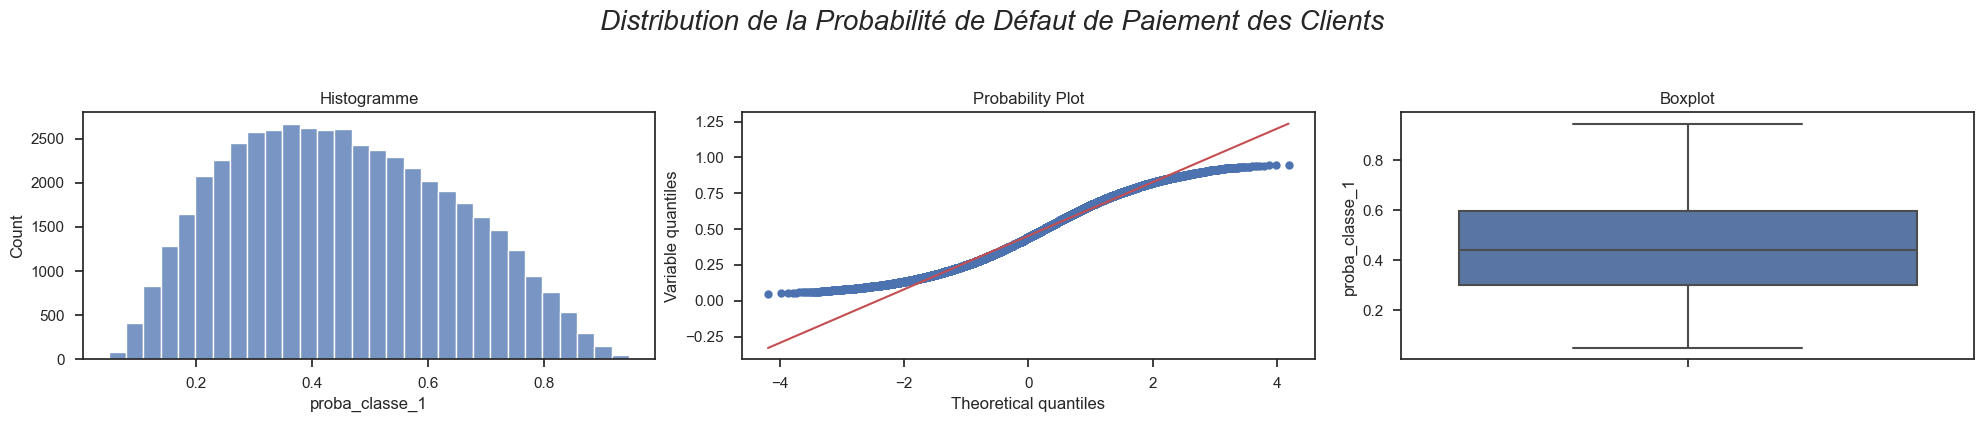

In [87]:
#diagnostic_plots(data_groupes, 'proba_classe_1', "Distribution de la Probabilité de Défaut de Paiement des Clients")

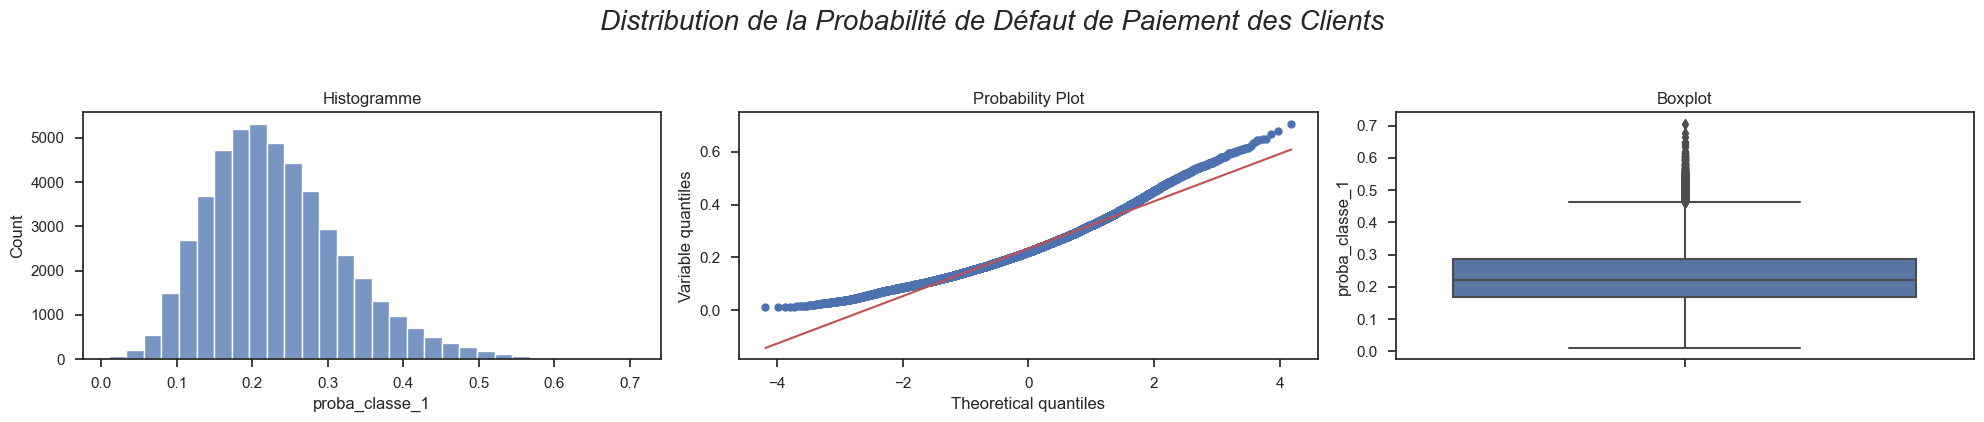

In [125]:
diagnostic_plots(data_groupes, 'proba_classe_1', "Distribution de la Probabilité de Défaut de Paiement des Clients")

<div class="alert alert-info">
<font color="red">qcut est une "fonction de discrétisation basée sur des quantiles".</font> 

Avec qcut l'on essaie de diviser les données sous-jacentes en <font color="red">groupes de taille égale.</font> 

La fonction définit les groupes à l'aide de centiles basés sur la distribution des données,

In [88]:
# # On décide de former 5 groupes
# pd.qcut(data_groupes.proba_classe_1, precision=1, q=5).head(10)

0    (-0.05, 0.3]
1      (0.6, 0.9]
2      (0.3, 0.4]
3      (0.4, 0.5]
4      (0.5, 0.6]
5      (0.3, 0.4]
6      (0.3, 0.4]
7      (0.3, 0.4]
8    (-0.05, 0.3]
9      (0.6, 0.9]
Name: proba_classe_1, dtype: category
Categories (5, interval[float64, right]): [(-0.05, 0.3] < (0.3, 0.4] < (0.4, 0.5] < (0.5, 0.6] < (0.6, 0.9]]

In [126]:
# On décide de former 5 groupes
pd.qcut(data_groupes.proba_classe_1, precision=1, q=5).head(10)

0    (0.16, 0.2]
1    (0.0, 0.16]
2    (0.3, 0.71]
3    (0.16, 0.2]
4    (0.3, 0.71]
5    (0.2, 0.24]
6    (0.16, 0.2]
7    (0.16, 0.2]
8    (0.2, 0.24]
9    (0.24, 0.3]
Name: proba_classe_1, dtype: category
Categories (5, interval[float64, right]): [(0.0, 0.16] < (0.16, 0.2] < (0.2, 0.24] < (0.24, 0.3] < (0.3, 0.71]]

In [127]:
# On labellise les 5 groupes
data_groupes['classe_clients'] = pd.qcut(data_groupes.proba_classe_1,
                                          q=5,
                                          precision=1,
                                          labels=['16%_et_moins',
                                                  '17%_20%',
                                                  '21%_24%',
                                                  '25%_30%',
                                                  '31%_et_plus'])

<div class="alert alert-info">

<h3>On vérifie que les <font color="red">5 groupes sont de même taille

In [128]:
#                                            
data_groupes['classe_clients'].value_counts()

16%_et_moins    9749
17%_20%         9749
25%_30%         9749
31%_et_plus     9749
21%_24%         9748
Name: classe_clients, dtype: int64

Text(0.5, 1.0, 'Classification des Clients basée sur la Probabilité de Défaut de Paiement\n')

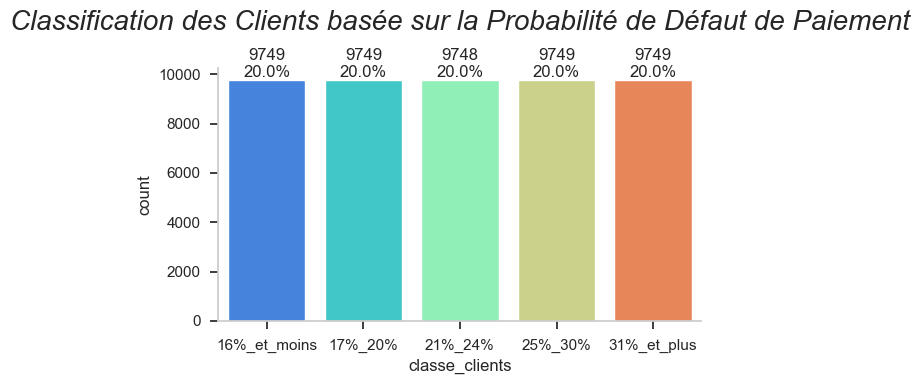

In [129]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_countplot(df=data_groupes, 
               col='classe_clients', 
               order=False,
                ax=ax, orient='v', size_labels=12)
sns.color_palette("husl", 9)
plt.title("Classification des Clients basée sur la Probabilité de Défaut de Paiement\n",
          loc="center", fontsize=20, fontstyle='italic')

<div class="alert alert-info">
<h3>
On affiche la Probabilité Moyenne de Défaut de Paiement par Groupe de Clients

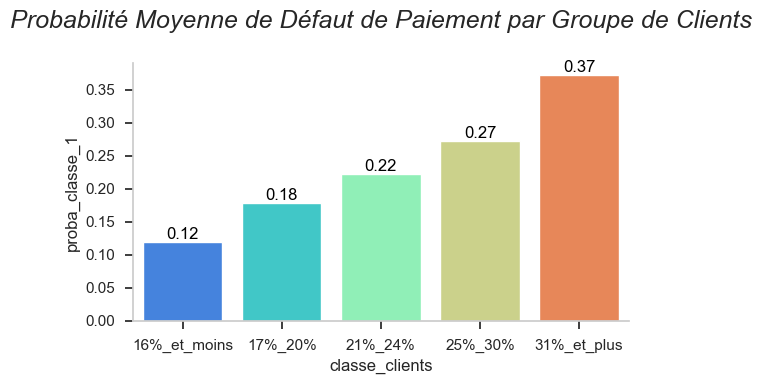

In [130]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_aggregation(df=data_groupes,
                 group_col='classe_clients',
                 value_col='proba_classe_1',
                 aggreg='mean',
                 ax=ax, orient='v', size_labels=12)

sns.color_palette("husl", 9)
plt.title("Probabilité Moyenne de Défaut de Paiement par Groupe de Clients\n",
          loc="center", fontsize=18, fontstyle='italic')

plt.show()

In [131]:
# On pratique la moyenne de chaque classe
data_groupes_mean = data_groupes.groupby(['classe_clients']).mean()

In [132]:
data_groupes_mean = data_groupes_mean.rename_axis('classe_clients').reset_index()
data_groupes_mean

classe_clients  proba_classe_1  ext_source_2  anciennete_entreprise  \
0   16%_et_moins            0.12         -0.54                  -0.05   
1        17%_20%            0.18         -0.49                  -0.01   
2        21%_24%            0.22         -0.47                   0.00   
3        25%_30%            0.27         -0.43                   0.02   
4    31%_et_plus            0.37         -0.32                   0.04   

   days_credit  age_client  cnt_instalment  flag_own_realty_Y  \
0        -0.49       -0.09            0.36               0.00   
1        -0.45       -0.02            0.42               0.00   
2        -0.43        0.02            0.44               0.00   
3        -0.39        0.05            0.46               0.00   
4        -0.26        0.09            0.49               0.00   

   name_type_suite_Famille  prev_contrat_type_revolving_loans  ...  \
0                    -0.00                              -0.01  ...   
1                     0.00                              -0.01  ...   
2                     0.00                              -0.01  ...   
3                     0.00                              -0.00  ...   
4                     0.00                               0.00  ...   

   montant_paye_vs_du  solde_credit_bureau_statut_actif_avec_jours_retard  \
0               -0.37                                               0.02    
1               -0.34                                               0.06    
2               -0.32                                               0.08    
3               -0.29                                               0.09    
4               -0.24                                               0.06    

   flag_document_6_Oui  pop_region  \
0                 0.00       -0.01   
1                 0.00       -0.00   
2                -0.00        0.01   
3                -0.00        0.01   
4                -0.00        0.01   

   reg_region_not_work_region_adresse_identique  nb_demande_pret_precedente  \
0                                         -0.00                        0.21   
1                                          0.00                        0.28   
2                                          0.00                        0.30   
3                                          0.00                        0.32   
4                                          0.00                        0.33   

   prev_contrat_type_consumer_loans  flag_emp_phone_Oui  \
0                             -0.02               -0.00   
1                             -0.04               -0.00   
2                             -0.04                0.00   
3                             -0.05                0.00   
4                             -0.07                0.00   

   name_contract_type_revolving_loans  year_registration  
0                                0.03              -0.06  
1                                0.03              -0.03  
2                                0.03              -0.01  
3                                0.04               0.02  
4                                0.04               0.07  

[5 rows x 27 columns]

<div class="alert alert-info">

<h3>Reprenons le même <font color="red"> client qui a fait la demande de crédit

In [133]:
idx = 2000
shap_du_client = data_groupes[data_groupes.index == idx]
shap_du_client

proba_classe_1  ext_source_2  anciennete_entreprise  days_credit  \
2000            0.55         -0.20                   0.11         0.06   

      age_client  cnt_instalment  flag_own_realty_Y  name_type_suite_Famille  \
2000        0.19            0.48               0.01                     0.00   

      prev_contrat_type_revolving_loans  region_rating_client_w_city  ...  \
2000                               0.00                         0.02  ...   

      solde_credit_bureau_statut_actif_avec_jours_retard  flag_document_6_Oui  \
2000                                              -0.01                 -0.00   

      pop_region  reg_region_not_work_region_adresse_identique  \
2000        0.00                                         -0.00   

      nb_demande_pret_precedente  prev_contrat_type_consumer_loans  \
2000                        0.26                             -0.11   

      flag_emp_phone_Oui  name_contract_type_revolving_loans  \
2000                0.00                                0.04   

      year_registration  classe_clients  
2000               0.19     31%_et_plus  

[1 rows x 27 columns]

<div class="alert alert-info">

<h3>Affichons <font color="red">le groupe de ce client

In [134]:
groupe_du_client = shap_du_client['classe_clients'].values
groupe_du_client[0]

'31%_et_plus'

<div class="alert alert-info">

<h3>Affichons les <font color="red">statistiques du groupe de ce client

In [135]:
data_groupes_mean[data_groupes_mean['classe_clients'] == groupe_du_client[0]]

classe_clients  proba_classe_1  ext_source_2  anciennete_entreprise  \
4    31%_et_plus            0.37         -0.32                   0.04   

   days_credit  age_client  cnt_instalment  flag_own_realty_Y  \
4        -0.26        0.09            0.49               0.00   

   name_type_suite_Famille  prev_contrat_type_revolving_loans  ...  \
4                     0.00                               0.00  ...   

   montant_paye_vs_du  solde_credit_bureau_statut_actif_avec_jours_retard  \
4               -0.24                                               0.06    

   flag_document_6_Oui  pop_region  \
4                -0.00        0.01   

   reg_region_not_work_region_adresse_identique  nb_demande_pret_precedente  \
4                                          0.00                        0.33   

   prev_contrat_type_consumer_loans  flag_emp_phone_Oui  \
4                             -0.07                0.00   

   name_contract_type_revolving_loans  year_registration  
4                                0.04               0.07  

[1 rows x 27 columns]

In [136]:
round(data_groupes_mean[data_groupes_mean['classe_clients'] == groupe_du_client[0]].iloc[0]["proba_classe_1"],2)

0.37

In [137]:
#[data_groupes_mean['typologie_clients'] == groupe_client[0]]]
comparaison_client_groupe = pd.concat([data_groupes[data_groupes.index == idx], 
                                      data_groupes_mean],
                                      axis = 0)
comparaison_client_groupe['classe_clients'] = np.where(comparaison_client_groupe.index == idx, 
                                                          X_test.iloc[idx, 0],
                                                          comparaison_client_groupe['classe_clients'])

In [138]:
comparaison_client_groupe

proba_classe_1  ext_source_2  anciennete_entreprise  days_credit  \
2000            0.55         -0.20                   0.11         0.06   
0               0.12         -0.54                  -0.05        -0.49   
1               0.18         -0.49                  -0.01        -0.45   
2               0.22         -0.47                   0.00        -0.43   
3               0.27         -0.43                   0.02        -0.39   
4               0.37         -0.32                   0.04        -0.26   

      age_client  cnt_instalment  flag_own_realty_Y  name_type_suite_Famille  \
2000        0.19            0.48               0.01                     0.00   
0          -0.09            0.36               0.00                    -0.00   
1          -0.02            0.42               0.00                     0.00   
2           0.02            0.44               0.00                     0.00   
3           0.05            0.46               0.00                     0.00   
4           0.09            0.49               0.00                     0.00   

      prev_contrat_type_revolving_loans  region_rating_client_w_city  ...  \
2000                               0.00                         0.02  ...   
0                                 -0.01                        -0.04  ...   
1                                 -0.01                        -0.01  ...   
2                                 -0.01                         0.00  ...   
3                                 -0.00                         0.02  ...   
4                                  0.00                         0.04  ...   

      solde_credit_bureau_statut_actif_avec_jours_retard  flag_document_6_Oui  \
2000                                              -0.01                 -0.00   
0                                                  0.02                  0.00   
1                                                  0.06                  0.00   
2                                                  0.08                 -0.00   
3                                                  0.09                 -0.00   
4                                                  0.06                 -0.00   

      pop_region  reg_region_not_work_region_adresse_identique  \
2000        0.00                                         -0.00   
0          -0.01                                         -0.00   
1          -0.00                                          0.00   
2           0.01                                          0.00   
3           0.01                                          0.00   
4           0.01                                          0.00   

      nb_demande_pret_precedente  prev_contrat_type_consumer_loans  \
2000                        0.26                             -0.11   
0                           0.21                             -0.02   
1                           0.28                             -0.04   
2                           0.30                             -0.04   
3                           0.32                             -0.05   
4                           0.33                             -0.07   

      flag_emp_phone_Oui  name_contract_type_revolving_loans  \
2000                0.00                                0.04   
0                  -0.00                                0.03   
1                  -0.00                                0.03   
2                   0.00                                0.03   
3                   0.00                                0.04   
4                   0.00                                0.04   

      year_registration  classe_clients  
2000               0.19            0.32  
0                 -0.06    16%_et_moins  
1                 -0.03         17%_20%  
2                 -0.01         21%_24%  
3                  0.02         25%_30%  
4                  0.07     31%_et_plus  

[6 rows x 27 columns]

In [139]:
comparaison_client_groupe_light = comparaison_client_groupe.drop(
    labels=['classe_clients', "proba_classe_1"], axis=1)

In [140]:
comparaison_client_groupe_numpy = comparaison_client_groupe.drop(
    labels=['classe_clients', "proba_classe_1"], axis=1).to_numpy()

print(comparaison_client_groupe_numpy)

[[-2.03614255e-01  1.08684949e-01  5.71193976e-02  1.89730805e-01
   4.81645800e-01  6.13284162e-03  3.19450216e-03  1.97524092e-03
   1.95738036e-02 -3.88659950e-02 -1.90297363e-02  1.50142691e-02
   6.13955862e-03  4.54984571e-02  1.53191085e-01 -7.11210939e-02
  -9.52812408e-03 -2.16741792e-03  2.68922895e-03 -4.92604636e-04
   2.58890914e-01 -1.14632557e-01  2.54722789e-03  4.09906443e-02
   1.89784299e-01]
 [-5.44267132e-01 -4.51616923e-02 -4.94041321e-01 -8.75442943e-02
   3.64788875e-01  5.00171244e-04 -4.16215449e-04 -1.11558972e-02
  -3.68864142e-02 -2.24249283e-02 -2.59067113e-03  1.73363707e-04
   4.92167001e-02 -5.95783651e-02 -5.68445531e-03 -3.68269068e-01
   2.43569537e-02  1.76028980e-03 -1.44216124e-02 -1.04683839e-04
   2.10175536e-01 -2.41651992e-02 -4.73193803e-03  2.95027883e-02
  -5.60694990e-02]
 [-4.94612185e-01 -1.29411690e-02 -4.54480303e-01 -1.78920392e-02
   4.22508170e-01  1.69364250e-03  2.25825160e-04 -9.34648368e-03
  -1.14914357e-02 -1.43802428e-02 -1.2

In [141]:
les_groupes_plus = ['Client','Groupe 1 avec 16%_et_moins', 'Groupe 2 avec 17%_20%', 'Groupe 3 avec 21%_24%', 'Groupe 4 avec 25%_30%', 'Groupe 5 avec 31_et_plus']

In [142]:
for i in range(6):
    affich_force_plot(i)

Le force_plot du Client


Le force_plot du Groupe 1 avec 16%_et_moins


Le force_plot du Groupe 2 avec 17%_20%


Le force_plot du Groupe 3 avec 21%_24%


Le force_plot du Groupe 4 avec 25%_30%


Le force_plot du Groupe 5 avec 31_et_plus


<div class="alert alert-success"><h4>
<font color="blue">
On constate que <font color="red">le client présente un risque de 55% de défaut de paiement.</font><br>
    
 Il est bien <font color="red">au dessus du groupe "31%_et_plus"</font><br>
    
Ce risque de <font color="red">défaut de paiement est supérieur à la moyenne de tous les autres groupes

<div class="alert alert-info"><h4>
<font color="blue">
<font color="red">Essayons un autre moyen de vérifier ce premier résultat.</font>
    
Pour cela utilisons la fonction <font color="red">shap.decision_plot </font>qui nous permettra de <font color="red">tout afficher sur un seul graphique

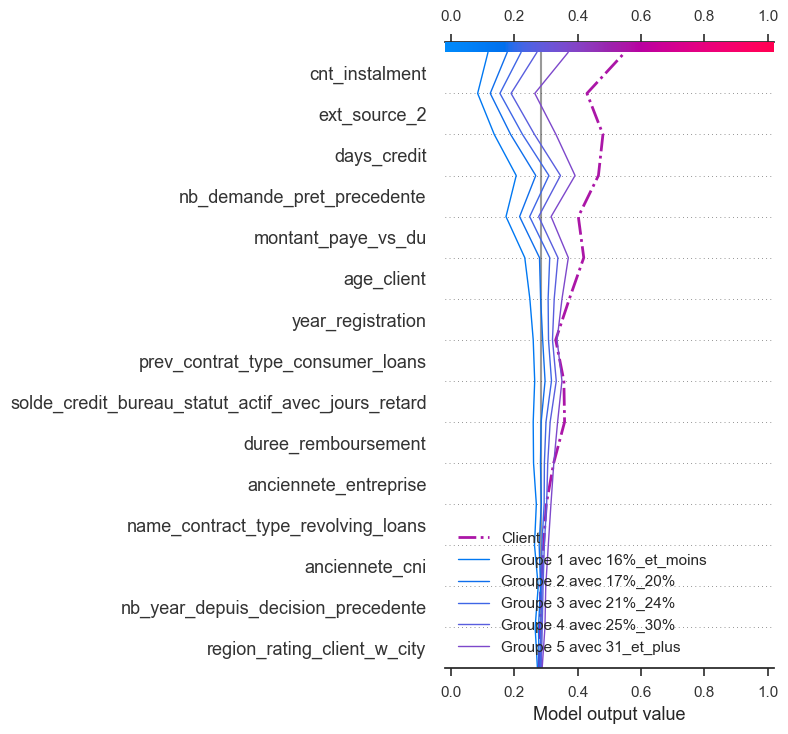

In [143]:
shap.decision_plot(explainer.expected_value[1], 
                   comparaison_client_groupe_numpy, 
                   feature_names=comparaison_client_groupe.drop(labels=['classe_clients', "proba_classe_1"], axis=1).columns.to_list(),
                   feature_order='importance',
                   highlight=0,
                   legend_labels=les_groupes_plus,
                   legend_location='lower left',
                   #On se limite aux 15 premières variables
                   feature_display_range=slice(None, -16, -1),
                   link='logit')

<div class="alert alert-success"><h4>
<font color="blue">
Nous obtenons <font color="red">la même conclusion qu'auparavant.</font>
    
<font color="red">Le client présente un risque de 55% de défaut de paiement.</font>
    
Ce risque de <font color="red">défaut de paiement est supérieur à la moyenne de tous les autres groupes sauf le dernier groupe

<div class="alert alert-danger"> <h2> 
La demande de prêt lui sera refusée
</div>